<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Привет! Меня зовут Нил. Я буду делать ревью проекта. Моя основная цель - отметить позитивные моменты и дать дополнительные рекомендации или комментарии по действиям. Для удобства я буду оформлять комментарии таким образом, как этот. Ревью будет немного отличаться от стандартного формата, поскольку в этом проекте нет готового и единого решения и я в первую очередь буду отталкиваться от задачи и твоих действий с данными, полноты выводов и корректности интерпретации результатов.

# Анализ данных медицинского центра

### Цель исследования

Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года

### Ссылка на данные:


https://disk.yandex.ru/d/Q2o2zUlRpLwpfQ


### Описание данных:


* `record_id` - уникальный идентификатор строки данных
* `service_date` - дата оказания медицинской услуги
* `service_name` - наименование медицинской услуги
* `service_number` - количество услуг
* `service_amount` - сумма выплат (стоимость оказанных услуг в рублях)
* `insured` - уникальный идентификатор пациента
* `sex_id` - пол пациента
* `age_for_service_date` - возраст пациента.

### Задачи исследования:


- Подготовка данных
- Базовый анализ данных
- Исследовательский анализ данных
- Определение основных показателей, описывающих стоимость лечения, в рамках каждой гипотезы
- Подсчет выручки за 2021 и 2022 годы, оценка изменений
- Выдвижение гипотез (3шт.)
- Описание показателей, которые требуется рассчитать для проверки гипотезы
- Расчет выбранных показателей на доступных данных
- Вывод о подтверждении или опровержении гипотезы на основе данных и расчет влияния данного фактора на повышение средней стоимости
- Общий вывод по результатам исследования
- Сдача тетрадок с проектом. Подготовка презентации в PDF.презентации в PDF.

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Отлично! Есть описание проекта и данных.

# Функции, используемые в работе

### Функция для создания столбца с признаком выброса: False - выброс

In [1]:
def data_ejection(df, col):
    upper_treshhold = df[col].describe()['75%'] + (df[col].describe()['75%']-df[col].describe()['25%'])*1.5
    lower_treshhold = df[col].describe()['25%'] -+ (df[col].describe()['75%']-df[col].describe()['25%'])*1.5
    if lower_treshhold < 0:
        lower_treshhold = 0
    df[f'{col}_norm'] = (df[col]<=upper_treshhold)&(df[col]>=lower_treshhold)

### Функция для построения гистограммы данных с выбросами и без

In [2]:
def show_distribution(df,col, bins=30, figsize=(10,3)):
    df[col].hist(bins=bins, figsize=figsize)
    plt.title(f'{col} - Распределение до исключения выбросов\n')
    plt.show()
    df.loc[df[f'{col}_norm'],col].hist(bins=bins, figsize=figsize)
    plt.title(f'{col} Распределение без выбросов\n')
    plt.show()

### Функция для отображения пропусков

In [3]:
def isna_func(df):
    isna = pd.DataFrame({'% of skips':round(df.isna().mean()*100,2), 'count of skips':round(df.isna().sum(),2)})
    isna = isna.sort_values(by=['count of skips'], ascending=False).style.format({'% of skips':"{:.2f}%"})
    return isna


### Функция для отображения ящика с усами и статистики по числовым столбцам

In [4]:
def ejection_info(df):
    for i in df.columns:
        try:
            df.boxplot(i)
            plt.title(i)
            plt.show()
            display(df[i].describe())
        except:
            continue

### Функция для нормализации наименований столбцов:


In [5]:
def col_rename(df):
    df.columns = [i.lower().replace(' ', '_') for i in df.columns]

### Функция для вывода сводного инфо отчета по датафрейму:


In [6]:
def info_pivot(df, format=True):
    info_pivot = pd.DataFrame({'Тип данных':df.dtypes,
                               'Первая строка':df.head(1).T[0],
                               'Всего записей':df.count(),
                               'Полнота данных в %': 100 - round(df.isna().mean()*100,2),
                               'Всего пропусков': df.isna().sum(),
                               'Кол-во уникальных':df.nunique(),
                               'Максимум':df.max(axis=0, skipna=True, numeric_only=True),
                               'Минимум':df.min(axis=0, skipna=True, numeric_only=True),
                               'Медиана':df.median(axis=0, skipna=True, numeric_only=True),
                               'Средняя':df.mean(axis=0, skipna=True, numeric_only=True)
                                }).sort_values(by='Кол-во уникальных')

    if format:
        info_pivot = (info_pivot.style
                                     .format({'Средняя':'{:.0f}',
                                              'Медиана':'{:.0f}',
                                              'Минимум':'{:.0f}',
                                              'Максимум':'{:.0f}',
                                              'Полнота данных в %':'{:.2f}%'})
                                     .background_gradient(axis=0, subset=['Всего записей','Полнота данных в %','Всего пропусков'])
                                     .highlight_quantile(color='yellowgreen',q_left=0.5, subset='Кол-во уникальных')
                     )
    return info_pivot

### Функция для исправления неявных дубликатов

In [7]:
def replace_wrong_values(wrong_values, correct_value): # на вход функции подаются список неправильных значений и строка с правильным значением
    for wrong_value in wrong_values: # перебираем неправильные имена
        tennis['name'] = tennis['name'].replace(wrong_value, correct_value) # и для каждого неправильного имени вызываем метод replace()

### Функция для просмотра количества значений

In [8]:
# column - название столбца в датафрейме, 
# format - если True то значения возвращаемой таблицы будут с форматом 
def val_counts(df, column='', format=False):
    if format:
        vc = pd.DataFrame({'Количество значений':df[column].value_counts(), '% значений':df[column].value_counts()/len(df)})
        vc = vc.style.format({'% значений':'{:.2%}'})
    else:
        vc = pd.DataFrame({'Количество значений':df[column].value_counts(), '% значений':df[column].value_counts()*100/len(df)})
    return vc

### Функция замены значений по словарю (создает новый столбец в датафрейме с результатом замены)

In [9]:
# col_source_name - исходный столбец датафрейма, 
# col_result_name - название нового столбца, где будут измененные значения
# replace_dict - словарь, где ключ это подстрока для поиска, а значение это то, на что будет в новом столбце если ключ(подстрока есть в старом столбце)
def replace_values(df, col_source_name = '', col_result_name='', replace_dict={}):
    df[col_result_name]  = df[col_source_name]
    for k, v in replace_dict.items():
        df.loc[df[col_source_name].str.contains(k), col_result_name] = v

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Отлично

# Подготовка данных:


### Импорт датасета и библиотек

In [10]:
# импортируюем набор необходимых библиотек
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import requests 
from urllib.parse import urlencode

In [11]:
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/Q2o2zUlRpLwpfQ' 

# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 

# загружаем файл в датафрейм 
download_response = requests.get(download_url) 
df = pd.read_excel(download_url)

    

### Установка формата отображения данных


In [12]:
# зададим формат отображения данных
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Знакомство с данными и первичная обработка

In [13]:
# запустим функцию для нормализации наименований столбцов датафрейма
col_rename(df)

In [14]:
# изучим датафрейм используя сводную информационную таблицу
info_pivot(df, format=True)

,Тип данных,Первая строка,Всего записей,Полнота данных в %,Всего пропусков,Кол-во уникальных,Максимум,Минимум,Медиана,Средняя
sex_id,float64,2.000000,85348,99.98%,21,2,2,1,2,2
service_number,int64,1,85369,100.00%,0,13,16,1,1,1
age_for_service_date,int64,26,85369,100.00%,0,76,83,0,34,34
service_amount,int64,1470,85369,100.00%,0,535,26999,147,1155,1166
service_date,object,2021-01-24,85369,100.00%,0,602,nan,nan,nan,nan
service_name,object,Прием первичный,85369,100.00%,0,875,nan,nan,nan,nan
insured,int64,490777,85369,100.00%,0,4488,1306795,125073,651895,654916
record_id,int64,30268157003,85369,100.00%,0,85369,33178147203,30268157003,31814131003,31799826572


Тип данных:
 *  `sex_id` - можно заменить на инт после заполнения пропусков
 *  `service_date` - заменить на datetime
 *  `insured` - т.к. это id, лучше заменить формат на object
 *  `record_id` - т.к. это id, лучше заменить формат на object

Пропуски:
*  `sex_id` - в этом столбце есть пропуски, необходимо решить, как от них избавиться


### Заполнение пропусков

In [15]:
df.query('sex_id.isna()')

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
4411,30489299203,2021-03-18,Прием первичный,1470,1,512590,NaN,26
4412,30489299303,2021-03-27,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,512590,NaN,26
4413,30489299403,2021-03-27,Общий анализ мочи,431,1,512590,NaN,26
4414,30489299503,2021-03-27,Альфа-амилаза панкреатическая,287,1,512590,NaN,26
4415,30489299603,2021-03-27,АЛТ (аланинаминотрансфераза),278,1,512590,NaN,26
4416,30489299703,2021-03-27,АСТ (аспартатаминотрансфераза),242,1,512590,NaN,26
4417,30489299803,2021-03-27,Билирубин общий,287,1,512590,NaN,26
4418,30489299903,2021-03-27,ГГТ (гамма - глютамилтрансфераза),287,1,512590,NaN,26
4419,30489300003,2021-03-27,Глюкоза крови,273,1,512590,NaN,26
4420,30489300103,2021-03-27,Фосфотаза щелочная,287,1,512590,NaN,26


In [16]:
# проверим, сколько уникальных пациентов имеют пропуски
df.query('sex_id.isna()')['insured'].unique()

array([512590, 221581], dtype=int64)

In [17]:
# проверка наличия заполненного поля у этих ID
print(df.query("insured == 512590")['sex_id'].value_counts())
print()
print(df.query("insured == 221581")['sex_id'].value_counts())

sex_id
2.00    4
Name: count, dtype: int64

Series([], Name: count, dtype: int64)


In [18]:
# Напишем функцию, которая заполнит пропуски с учетом id пациента, если в датасте есть информация о поле по этим id
for i in df.query('sex_id.isna()')['insured'].unique():
    try:
        df.loc[(df['insured']==i)&(df['sex_id'].isna()),'sex_id'] = df.loc[(df['insured']==i)&(df['sex_id'].isna()),'sex_id'].fillna(float(df.loc[(df['insured']==i)&~(df['sex_id'].isna()),'sex_id'].unique()))
    except:
        print(f"пропуски insured = {i} не заполнены")

пропуски insured = 221581 не заполнены


C:\Users\IstominA\AppData\Local\Temp\ipykernel_23712\1984424082.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  df.loc[(df['insured']==i)&(df['sex_id'].isna()),'sex_id'] = df.loc[(df['insured']==i)&(df['sex_id'].isna()),'sex_id'].fillna(float(df.loc[(df['insured']==i)&~(df['sex_id'].isna()),'sex_id'].unique()))


У пациента с ID 221581 нет данных о поле, таких записей всего 4, что меньше 1% от датасета, поэтому просто удалим их

In [19]:
df = df.dropna(subset=['sex_id'])
df[df['sex_id'].isna()]

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date


C пропусками разобрались, теперь приведем в порядок форматы столбцов

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Детальный подход

### Установка форматов для столбцов


In [20]:
df['sex_id'] = df['sex_id'].astype('int')
df['service_date'] = pd.to_datetime(df['service_date'])
df['insured'] = df['insured'].astype('object')
df['record_id'] = df['record_id'].astype('object')

Изучим информацию об измененном датафрейме

In [21]:
info_pivot(df, format=True)

,Тип данных,Первая строка,Всего записей,Полнота данных в %,Всего пропусков,Кол-во уникальных,Максимум,Минимум,Медиана,Средняя
sex_id,int32,2,85365,100.00%,0,2,2,1,2,2
service_number,int64,1,85365,100.00%,0,13,16,1,1,1
age_for_service_date,int64,26,85365,100.00%,0,76,83,0,34,34
service_amount,int64,1470,85365,100.00%,0,535,26999,147,1155,1166
service_date,datetime64[ns],2021-01-24 00:00:00,85365,100.00%,0,602,nan,nan,nan,nan
service_name,object,Прием первичный,85365,100.00%,0,875,nan,nan,nan,nan
insured,object,490777,85365,100.00%,0,4487,nan,nan,nan,nan
record_id,object,30268157003,85365,100.00%,0,85365,nan,nan,nan,nan


Теперь данные готовы для дальнейшего анализа

### Добавление аналитик

In [22]:
df['date_trunc_month'] = df['service_date'].dt.to_period('M').dt.strftime('%Y-%m')
df['month'] = df['service_date'].dt.month
df['year'] = df['service_date'].dt.year
df['weekday'] = df['service_date'].dt.weekday

# создадим столбец в датафрейме с выручкой в млн. руб.
df['service_amount_mln'] = df['service_amount']/1000000 

In [23]:
# создадим столбец с разбивкой возрастов по квартилям
df['age_category_id'] = pd.qcut(x=df['age_for_service_date'], q=4, labels=range(1,5))

# создадим столбец с разбивкой стоимости услуг по квартилям
df['service_amount_id'] = pd.qcut(x=df['service_amount'], q=4, labels=range(1,5))

In [24]:
# создадим столбец, в котором будет указан возрастной дипазон
for i in range(1,5):
    min_age=str(df.loc[df['age_category_id']==i, 'age_for_service_date'].min())
    max_age=str(df.loc[df['age_category_id']==i, 'age_for_service_date'].max())
    df.loc[df['age_category_id']==i,'age_category'] = f'{min_age}_{max_age}'

# создадим столбец, в котором будет указан ценовой диапазон
for i in range(1,5):
    min_amount=str(df.loc[df['service_amount_id']==i, 'service_amount'].min())
    max_amount=str(df.loc[df['service_amount_id']==i, 'service_amount'].max())
    df.loc[df['service_amount_id']==i,'service_category'] = f'{min_amount}_{max_amount}'

In [25]:
# изучим датафрейм используя сводную информационную таблицу
info_pivot(df, format=True)

,Тип данных,Первая строка,Всего записей,Полнота данных в %,Всего пропусков,Кол-во уникальных,Максимум,Минимум,Медиана,Средняя
year,int32,2021,85365,100.00%,0,2,2022,2021,2021,2021
sex_id,int32,2,85365,100.00%,0,2,2,1,2,2
service_category,object,1156_1530,85365,100.00%,0,4,nan,nan,nan,nan
age_category,object,0_27,85365,100.00%,0,4,nan,nan,nan,nan
age_category_id,category,1,85365,100.00%,0,4,nan,nan,nan,nan
service_amount_id,category,3,85365,100.00%,0,4,nan,nan,nan,nan
weekday,int32,6,85365,100.00%,0,7,6,0,3,3
month,int32,1,85365,100.00%,0,12,12,1,5,6
service_number,int64,1,85365,100.00%,0,13,16,1,1,1
date_trunc_month,object,2021-01,85365,100.00%,0,20,nan,nan,nan,nan


### Работа с дубликатами

In [26]:
# проверим наличие полных дубликатов
df.duplicated().sum()

0

Явных дубликатов в датафрейме нет, проверим наличие неявных, они могут быть только в столбце `service_name`

In [27]:
df['service_name_low'] = df['service_name'].str.lower()
df['service_name_low'].value_counts().to_frame().reset_index()

,service_name_low,count
0,прием первичный,6056
1,прием повторный,4475
2,взятие крови из периферической вены,4215
3,"общий анализ крови (лейкоцитарная форм,, соэ)",3190
4,магнитотерапия (1 сеанс),2838
5,взятие мазка,1567
6,общий анализ мочи,1550
7,лазеротерапия (1 сеанс),1313
8,интерференционные токи (1 сеанс) (4 поля),1195
9,гинекологический мазок,1194


Пробежавшись по списку можно заметить, что повторный и первичный прием дублируются, есть приемы с указанием и без указания специалиста. В данном случае, я бы создал столбец обобщающий подобные дубли.

In [28]:
# чтобы было проще выделять категории, воспользуемся поиском по подстроке
var='анализ'
df[df['service_name_low'].str.contains(var)]['service_name_low'].value_counts()

service_name_low
общий анализ крови (лейкоцитарная форм,, соэ)                                                                                                                                                                                                                     3190
общий анализ мочи                                                                                                                                                                                                                                                 1550
эхокардиография с допплеровским анализом                                                                                                                                                                                                                           327
общий анализ кала                                                                                                                                                                                 

In [29]:
# словарь где ключ это подстрока которую будем искать в столбце с названием услуги, а значением будет заполнять новый столбец
replace_dict=({'прием':'прием врача',
               'мазка':'мазки',
               'мазок':'мазки',
               'массаж':'массаж',
               'анализ':'анализы',
               'терапи':'терапия',
               'ультразвуковое':'узи',
               'экг':'экг',
               'эхокардиог':'экг',
               'рентгенография':'рентгенография',
               'дуплексное сканирование':'дуплексное сканирование',
               'исследован':'исследования',
               'электрофорез':'электрофорез',
               'sars-cov-2':'пцр корона',
               'анестезия':'анестезия',
               'посев':'посевы',
               'мрт':'мрт'
              })
# создадим столбец с заменой по словарю с помощью функции replace_values
replace_values(df, col_source_name = 'service_name_low', col_result_name='service_name_new', replace_dict=replace_dict)    

In [30]:
# Создадим временную сводную со статистикой по наименованию услуги
temp = df.groupby(['service_name_new']).agg({'service_name':'count','service_amount':'sum','service_number':'sum'}).reset_index()
temp = temp.rename(columns={'service_name':'count'})
# Рассчитаем среднюю выручку на одну услугу
temp['avg_price'] = round(temp['service_amount']/temp['service_number'],1)
# Рассчитаем долю количества услуг из общего количества
temp['%_of_total_rev'] = round(temp['service_amount']/temp['service_amount'].sum()*100,2)
temp = temp.sort_values(by='service_amount', ascending=False).reset_index()
# Рассчитаем накопительную долю количества услуг
temp['cumul_%'] = round(temp['%_of_total_rev'].cumsum(axis=0),2)

# создадим столбец с категорией. Для услуг накопительная доля выручки которых меньше s, оставим название услуги, остальные пометим как прочие
# так в топе окажутся услуги с самой крупной выручкой
s = 75
temp['category'] = temp.loc[temp['cumul_%'] <=s, 'service_name_new']
temp['category'] = temp['category'].fillna('прочие')
temp


,index,service_name_new,count,service_amount,service_number,avg_price,%_of_total_rev,cumul_%,category
0,383,прием врача,26285,38947066,26285,1481.70,39.13,39.13,прием врача
1,249,исследования,7726,13149604,7948,1654.50,13.21,52.34,исследования
2,473,терапия,6505,10306570,6556,1572.10,10.35,62.69,терапия
3,426,рентгенография,2486,4211054,2572,1637.30,4.23,66.92,рентгенография
4,101,анализы,5150,3326763,5150,646.00,3.34,70.26,анализы
5,541,экг,2404,2553483,2404,1062.20,2.57,72.83,экг
6,309,массаж,1841,2311923,1844,1253.80,2.32,75.15,прочие
7,226,дуплексное сканирование,623,1732055,623,2780.20,1.74,76.89,прочие
8,307,мазки,2896,1540739,3603,427.60,1.55,78.44,прочие
9,247,интерференционные токи (1 сеанс) (4 поля),1195,1286420,1195,1076.50,1.29,79.73,прочие


In [31]:
# Добавим категорию к датафрейму
df = df.merge(temp[['service_name_new','category']], how='left', on='service_name_new')
df.head()

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,date_trunc_month,month,year,weekday,service_amount_mln,age_category_id,service_amount_id,age_category,service_category,service_name_low,service_name_new,category
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2,26,2021-01,1,2021,6,0.00,1,3,0_27,1156_1530,прием первичный,прием врача,прием врача
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое исследование ( риноцитограмма)",284,1,490777,2,26,2021-01,1,2021,6,0.00,1,1,0_27,147_550,"взятие материала на посев, цитологическое исследование ( риноцитограмма)",посевы,прочие
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам",1134,1,490777,2,26,2021-01,1,2021,6,0.00,1,2,0_27,556_1155,"посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам",посевы,прочие
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2,26,2021-01,1,2021,6,0.00,1,2,0_27,556_1155,"общий анализ крови (лейкоцитарная форм,, соэ)",анализы,анализы
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2,26,2021-01,1,2021,6,0.00,1,1,0_27,147_550,ревматоидный фактор,ревматоидный фактор,прочие


,category,unique_client,total_rev_mln,count,%_of_rev_mln,%_of_count
2,прием врача,4416,38.95,26285,39.13,30.79
3,прочие,3467,27.05,34809,27.17,40.78
1,исследования,2378,13.15,7726,13.21,9.05
5,терапия,646,10.31,6505,10.35,7.62
4,рентгенография,1387,4.21,2486,4.23,2.91
0,анализы,2267,3.33,5150,3.34,6.03
6,экг,737,2.55,2404,2.57,2.82


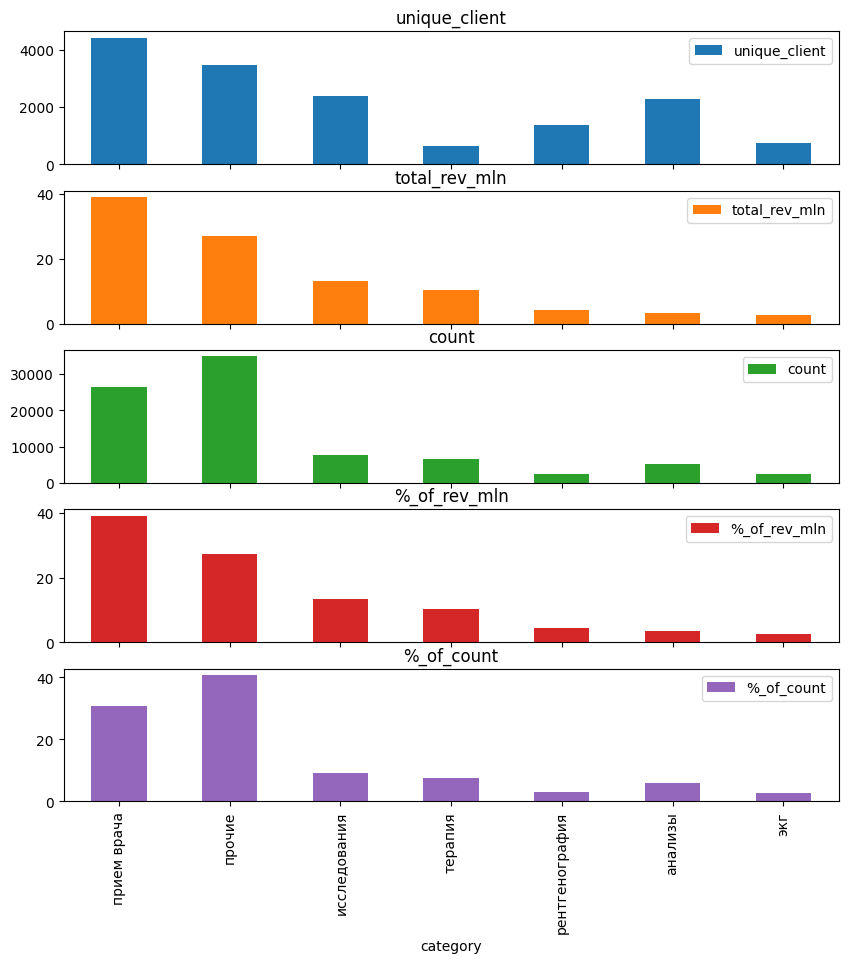

In [32]:
# создадим сводную по полученным категориям
rev_pivot = (df.groupby('category')
             .agg({'insured':'nunique',
                   'service_amount_mln':'sum',
                   'service_name_new':'count'})
             .reset_index()
             .sort_values(by='service_amount_mln', ascending=False))
rev_pivot = rev_pivot.rename(columns={'insured':'unique_client',
                                      'service_amount_mln':'total_rev_mln',
                                      'service_name_new':'count'})
rev_pivot['%_of_rev_mln'] = round(rev_pivot['total_rev_mln']/rev_pivot['total_rev_mln'].sum()*100,2)
rev_pivot['%_of_count'] = round(rev_pivot['count']/rev_pivot['count'].sum()*100,2)
display(rev_pivot)
rev_pivot.plot(x='category', subplots=True, kind='bar', figsize=(10,10));

На текущий момент у нас 7 категорий, которые можно использовать для анализа. Категория "прочие" составляет 27% от общей выручки за все время


<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Интересный подход

### Проверка корректности заполнения поля `sex_id`

на всякий случай проверим, что по одному id пациента нет двух разных полов

In [33]:
sex_id_check = df.groupby('insured').agg({'sex_id':'nunique'}).reset_index()
sex_id_check.sort_values(by='sex_id', ascending=False).head()

,insured,sex_id
0,125073,1
2989,822712,1
2995,822718,1
2994,822717,1
2993,822716,1


Таких ошибок в записях нет

### Проверка корректности заполнения поля `age_for_service_date`

Также проверим возраст клиентов

In [34]:
sex_id_check = df.groupby('insured').agg({'age_for_service_date':'nunique'}).reset_index()
sex_id_check.sort_values(by='age_for_service_date', ascending=False).head()

,insured,age_for_service_date
344,221655,3
205,194254,3
783,490582,3
483,266805,3
793,490592,3


Вот это уже выглядит странно, у нас данные за два года, кажется, что может быть максимум два уникальных значения по возрасту одного клиента. Проверим так ли это.

In [35]:
(df[df['insured']==221655][['date_trunc_month','age_for_service_date']]
 .drop_duplicates(subset=['date_trunc_month','age_for_service_date'])
 .sort_values(by='date_trunc_month'))

,date_trunc_month,age_for_service_date
1139,2021-01,37
23754,2021-08,38
44019,2021-12,38
44819,2022-01,38
54030,2022-03,39
64831,2022-04,39
67965,2022-05,39


Судя по отчету это возможно, клиент обратился с первым визитом в возрасте 37 лет, в феврале того же года у него был день рождения и ему исполнилось 38 лет, в следующем году в феврале ему исполнилось 39. Это говорит о том, что проблем в том что у клиентов 3 уникальных значения возраста нет.

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Интересное наблюдение

### Обработка выбросов 

Для наглядности построим ящики с усами и с помощью функции ejection_info, а с помощью функции data_ejection пометим выбросы


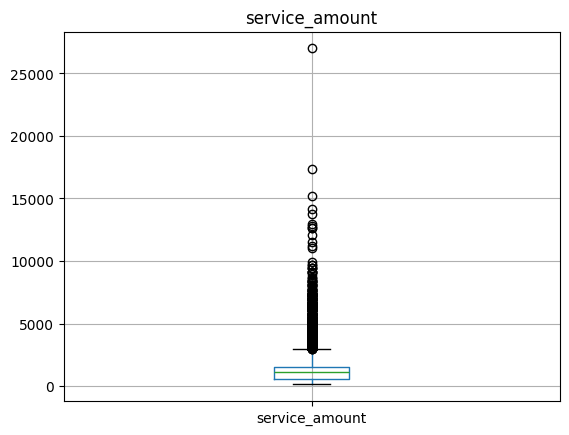

count   85365.00
mean     1166.08
std       799.08
min       147.00
25%       550.00
50%      1155.00
75%      1530.00
max     26999.00
Name: service_amount, dtype: float64

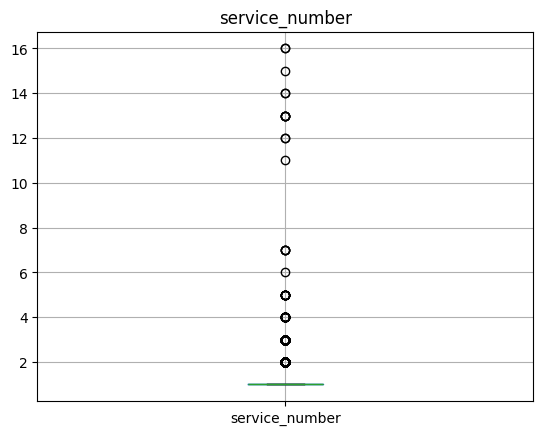

count   85365.00
mean        1.02
std         0.23
min         1.00
25%         1.00
50%         1.00
75%         1.00
max        16.00
Name: service_number, dtype: float64

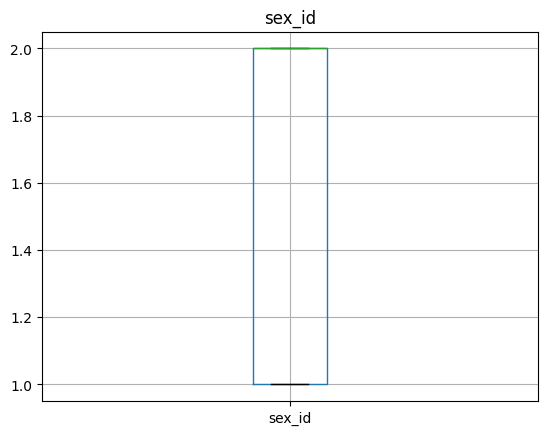

count   85365.00
mean        1.62
std         0.49
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: sex_id, dtype: float64

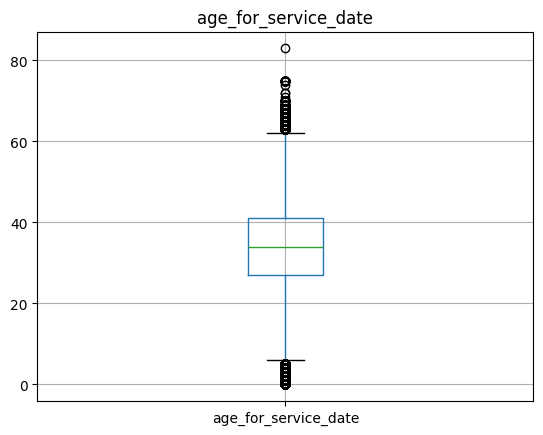

count   85365.00
mean       33.85
std        12.14
min         0.00
25%        27.00
50%        34.00
75%        41.00
max        83.00
Name: age_for_service_date, dtype: float64

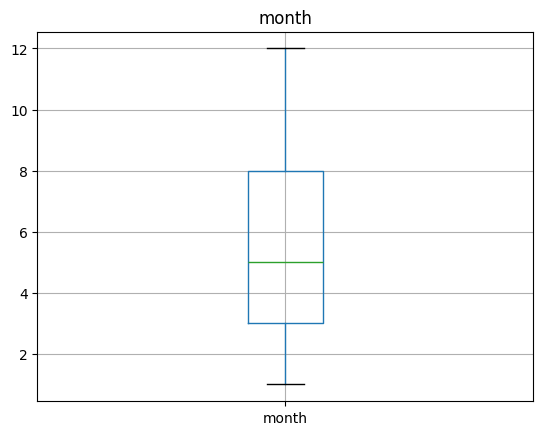

count   85365.00
mean        5.82
std         3.07
min         1.00
25%         3.00
50%         5.00
75%         8.00
max        12.00
Name: month, dtype: float64

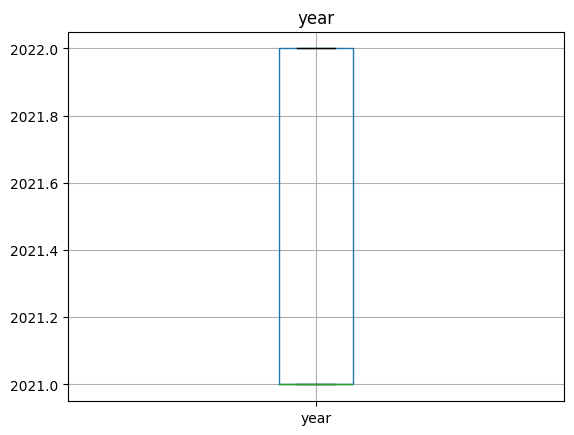

count   85365.00
mean     2021.48
std         0.50
min      2021.00
25%      2021.00
50%      2021.00
75%      2022.00
max      2022.00
Name: year, dtype: float64

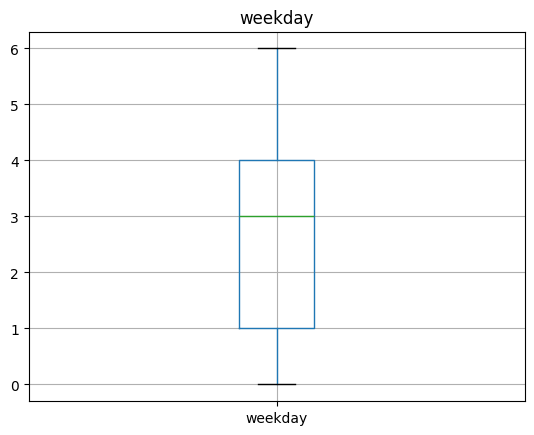

count   85365.00
mean        2.85
std         1.93
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: weekday, dtype: float64

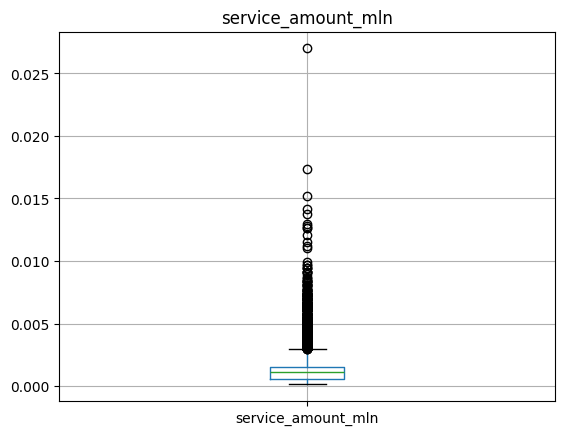

count   85365.00
mean        0.00
std         0.00
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         0.03
Name: service_amount_mln, dtype: float64

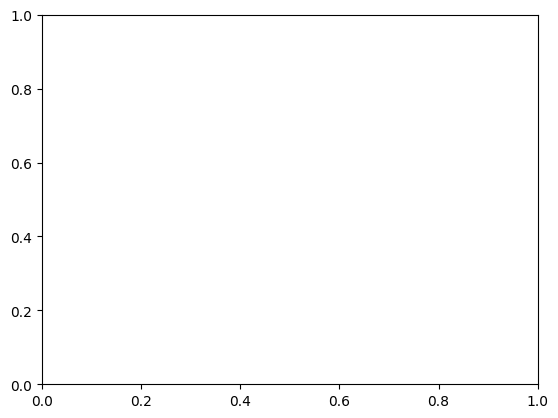

In [36]:
ejection_info(df)

Судя по графикам, вырбосы есть в столбцах `service_amount`, `service_amount_mln`, `service_number`, `age_for_service_date`

Создадим стобцы пометив выбросы как False

In [37]:
data_ejection(df, col='service_number')
data_ejection(df, col='service_amount')
data_ejection(df, col='age_for_service_date')

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Отличное изучение данных и их подготовка

# Исследовательский анализ

Для начала изучим гистограммы датафрейма

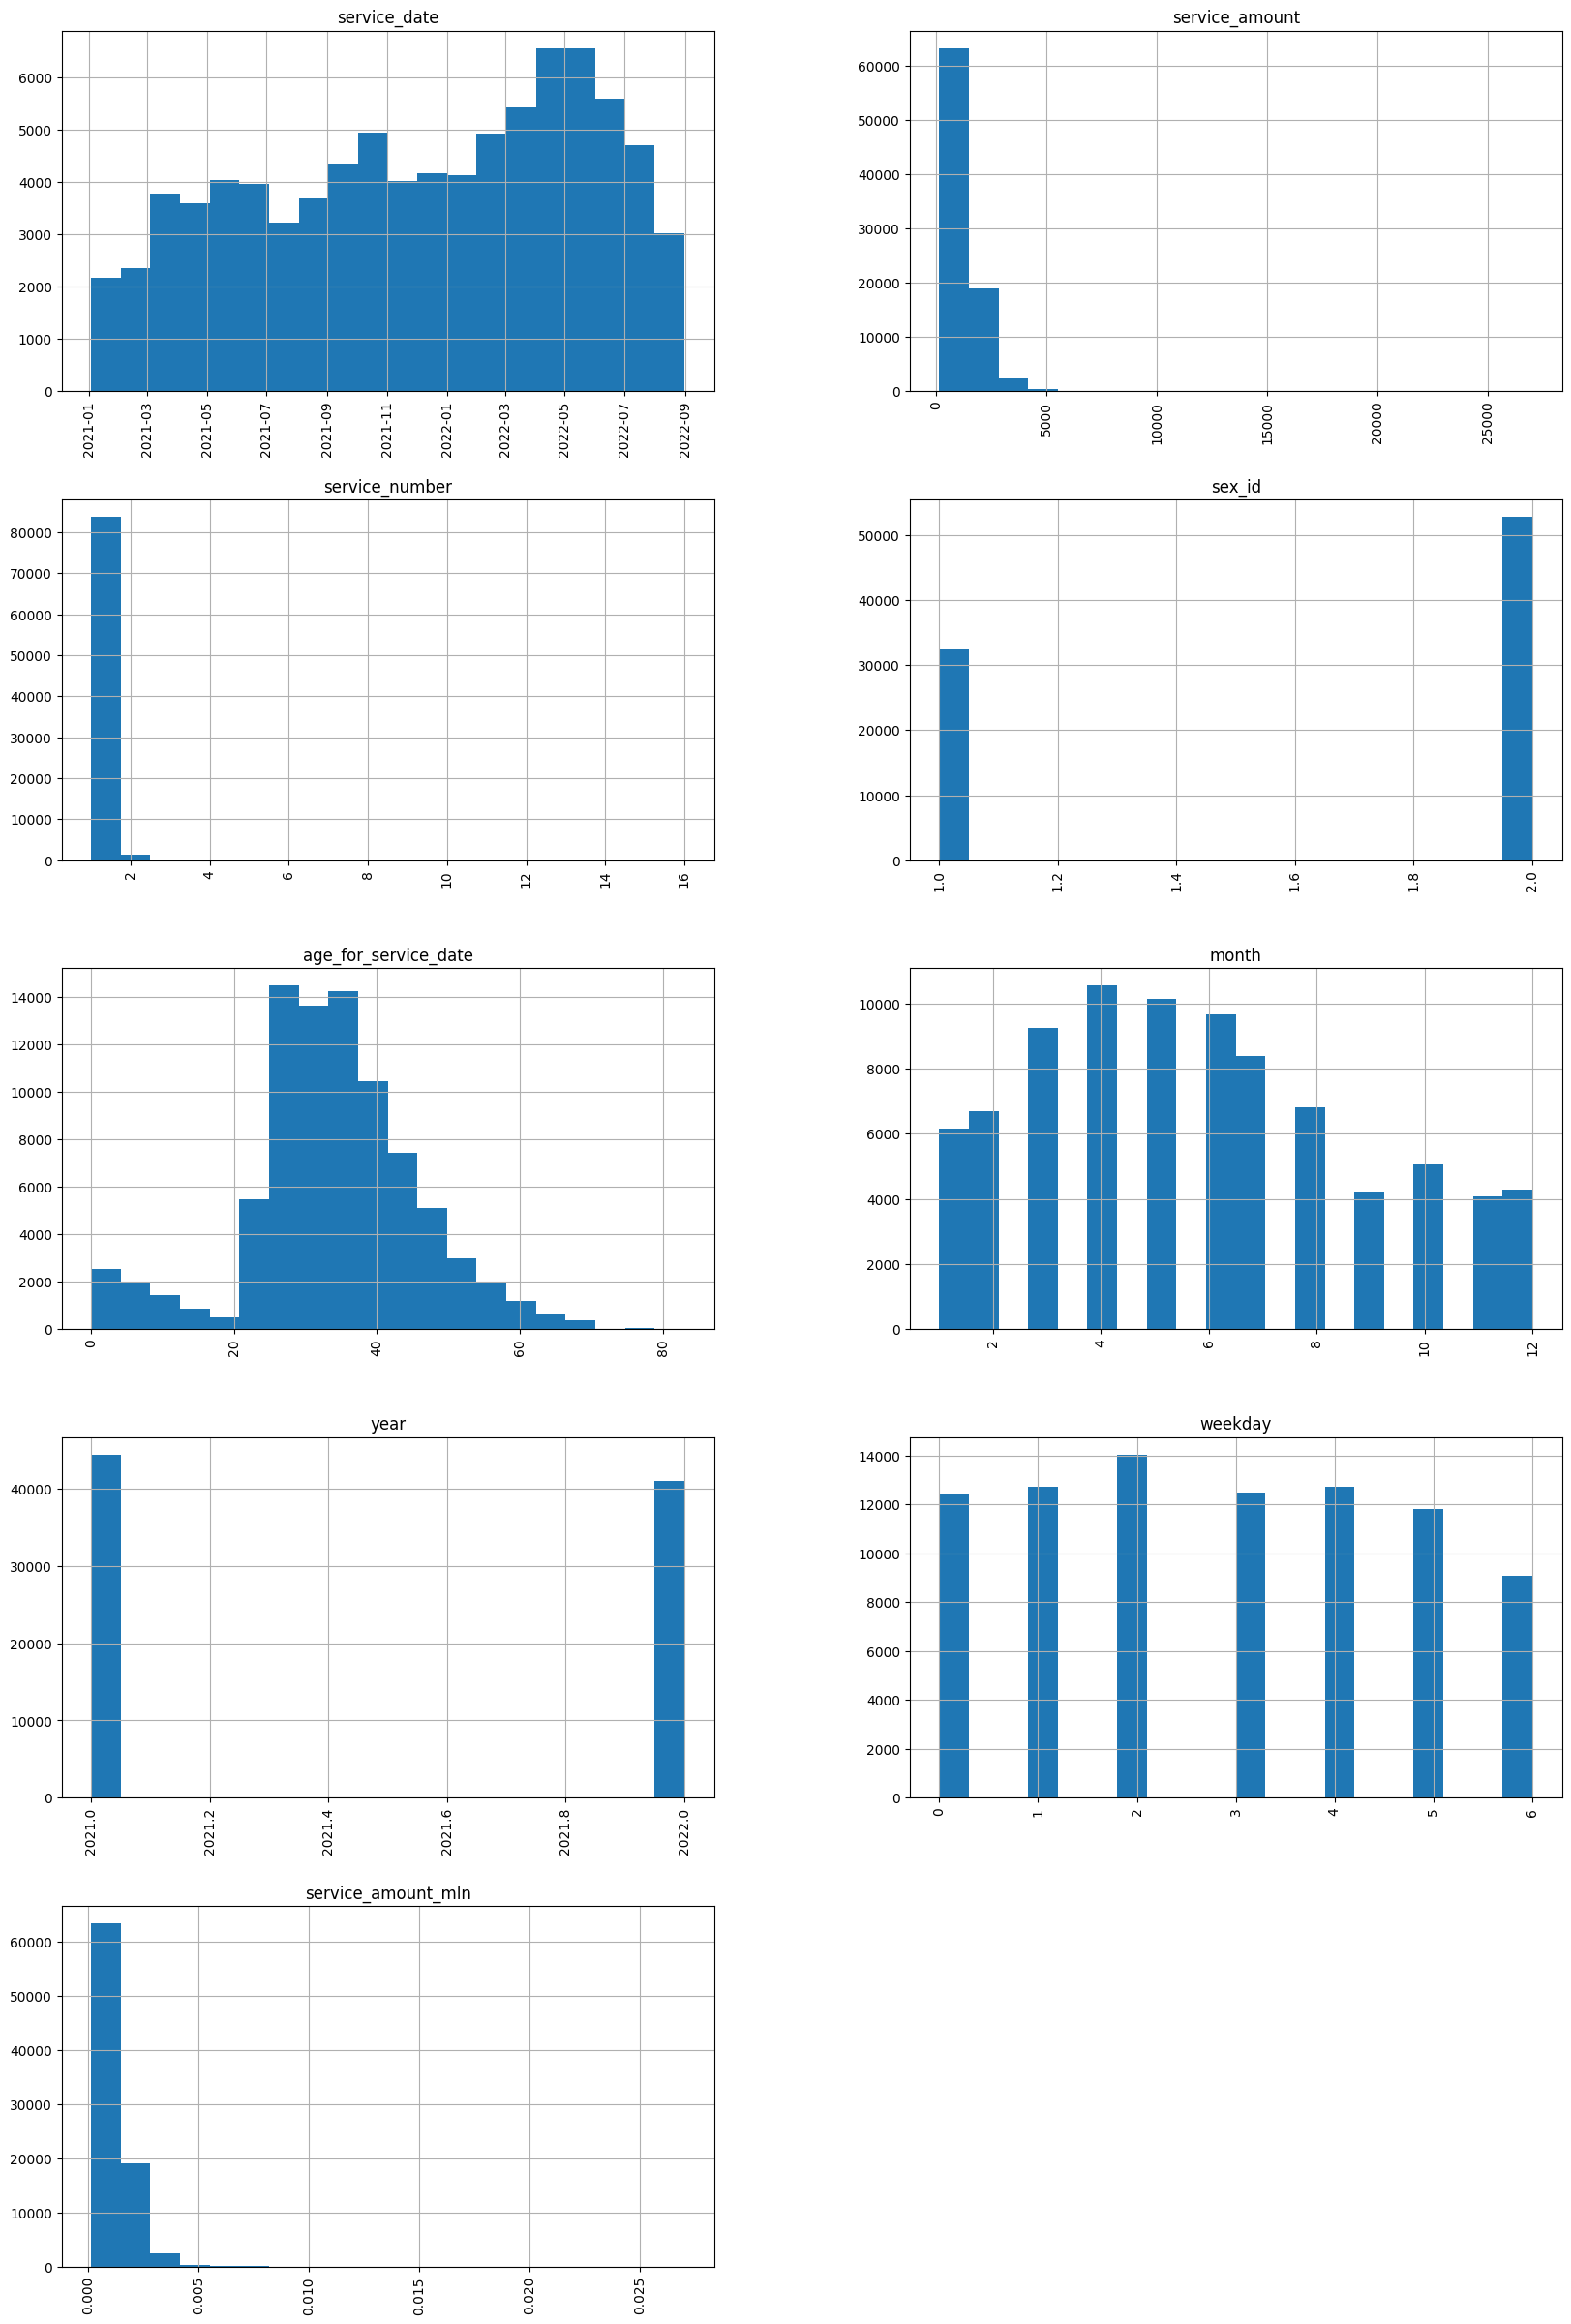

In [38]:
df.hist(figsize=(20,30), bins=20,

 layout=(5,2), xrot=90);

Записи в датафрейме это по сути фиксация факта оказанной услуги, поэтому распределение на графиках отображает количество оказанных услуг

Выводы:
* service_date - больше всего услуг было оказано в апреле и мае 2022 года, меньше всего в первые два месяца 2021
* service_amount - чаще всего стоимость услуг не превышает 3 тыс. руб.
* service_number - в рамках одной записи редко больше одной услуги
* sex_id - чаще услугами центра пользуются девушки (2)
* age_for_service_date - целевая аудитория центра в находится в возрасте от 20-50 лет
* month - c января по август, самыми популярными месяцами являются апрель, май и июнь, т.е. 2й кваратал.
* weekday - распределение выглядит совершенно нормальным, в воскресенье меньше всего записей, в среду больше всего

Изучим распределения без учета выбросов, и посмотрим насколько изменились выводы.
Для сравнения результатов с выбросами и без воспользуемся функцией show_distribution

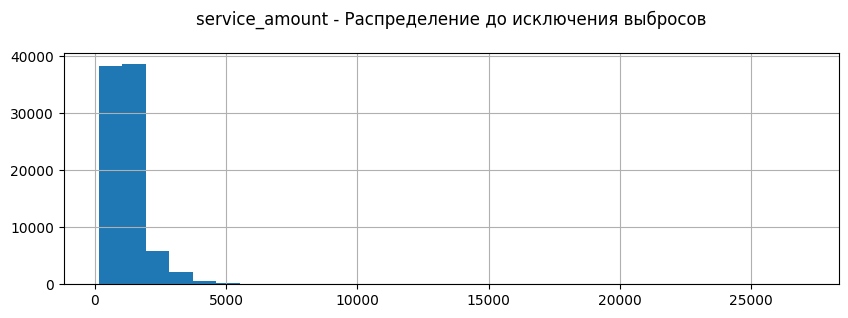

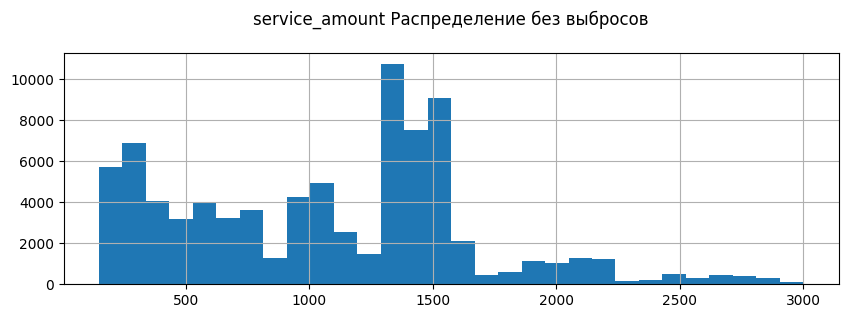

In [39]:
show_distribution(df,col='service_amount', bins=30)

Как описано выше, стоимость услуг редко превышает 3т. руб. чаще всего стоимость услуг в диапазонах 1.3-1.5т. руб.

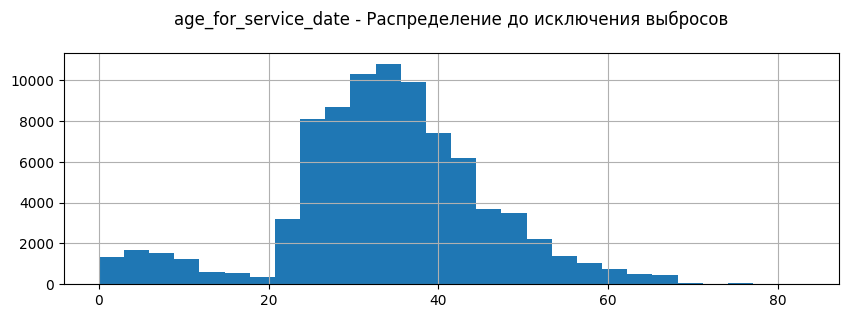

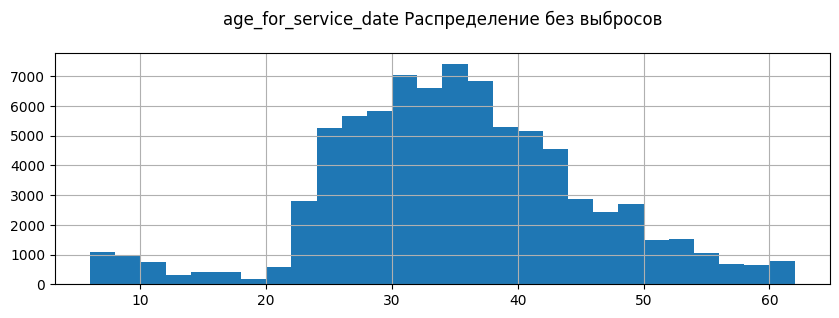

In [40]:
bins = (len(df[df['age_for_service_date_norm']]['age_for_service_date'].unique())-1)//2
show_distribution(df,col='age_for_service_date', bins=bins)

Какжется, что чем старше возраст, тем хуже обстоят дела со здоровьем, однако распределение показывает, что после 50 лет, люди реже обращаюстя в центр. Скорей всего это связано с платежеспособностью и чем выше возраст, тем больше вероятность, что пациент выберет бесплатную поликлинику.

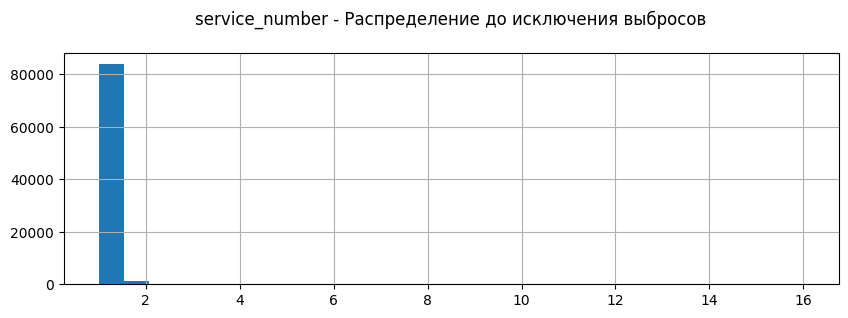

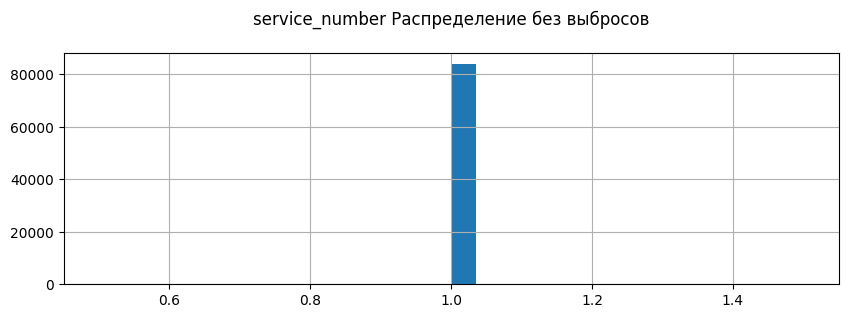

In [41]:
show_distribution(df,col='service_number', bins=bins)

Выбросами оказались все записи, где больше 1 услуги

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Распределения очень наглядные!

Построим матрицу линейных корреляций

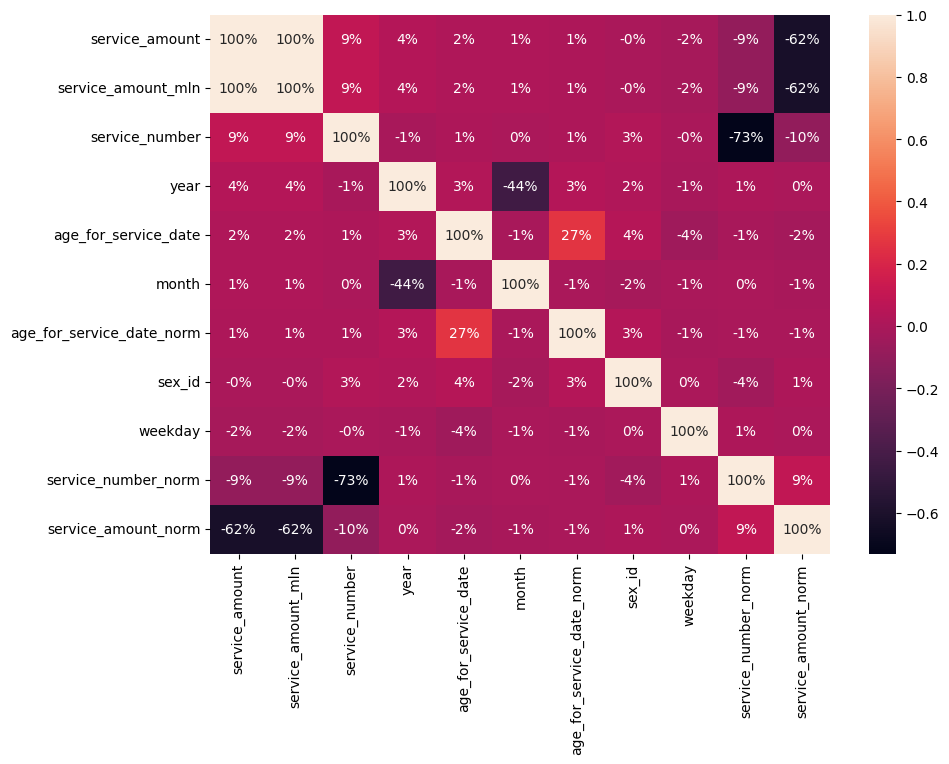

In [42]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True)
            .sort_values(by='service_amount', ascending=False)
            .sort_values(by='service_amount', ascending=False, axis=1), 
            annot=True, 
            fmt='.0%');

Между столбцами отражающими различные сущности нет очевидной линейной прямой или обратной взаимосвязи.

# Анализ показателей и выдвижение гипотез

Сравним выручку за два года отобразив динамику на графике


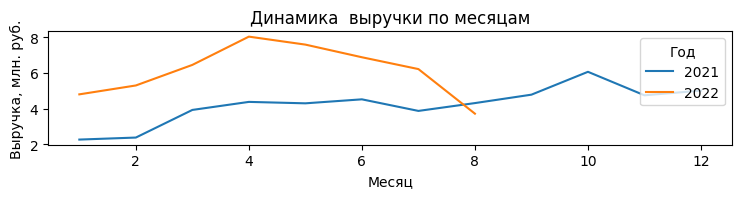

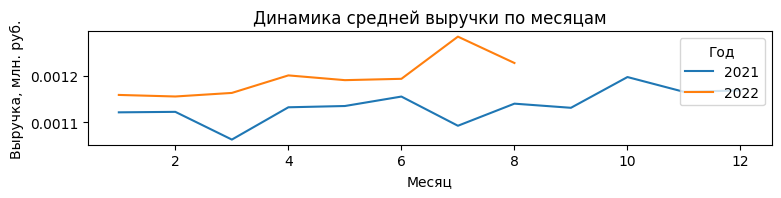

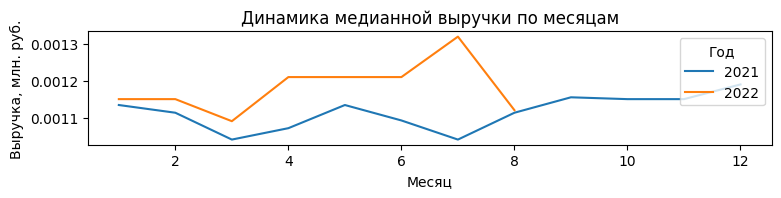

In [43]:
# Запакуем в функцию визуализацию динамики суммарной, средней и медианной выручки
def rev_dinamics(df):
    rev_by_year_sum = df.pivot_table(index='month', 
                                                            columns=['year'], 
                                                            values='service_amount_mln',
                                                            aggfunc='sum').reset_index()
    rev_by_year_mean = df.pivot_table(index='month', 
                                                            columns=['year'], 
                                                            values='service_amount_mln',
                                                            aggfunc='mean').reset_index()
    rev_by_year_median = df.pivot_table(index='month', 
                                                            columns=['year'], 
                                                            values='service_amount_mln',
                                                            aggfunc='median').reset_index()
    l={0:rev_by_year_sum,
       1:rev_by_year_mean,
       2:rev_by_year_median}
    names=['', 'средней', 'медианной']
    dic_temp={}
    for i in range(3):  
        plt.figure(figsize=(30,5))
        dic_temp[i] = plt.subplot(3,3,i+1)
        l[i].plot(x='month', y=[2021, 2022], ax = dic_temp[i], )
        plt.title(f'Динамика {names[i]} выручки по месяцам')
        plt.xlabel('Месяц')
        plt.ylabel('Выручка, млн. руб.')
        plt.legend(title='Год', loc='upper right')
        
        plt.show();

# Вызовем функцию, которая нарисует динамику выручки по месяцам
rev_dinamics(df)        

<div class="alert alert-info"  style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
    
<h2>Комментарий студента: <a class="tocSkip"> </h2>

Не нашел способа выравнить первый график под ось x, нижних графиков. Буду признателен, если дадите наводку)   .   

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Кажется в документации есть эта история:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html#sphx-glr-gallery-subplots-axes-and-figures-shared-axis-demo-py

**Выручка**: Выручка плавно растет с января 2021 вплоть до апреля 2022, после началось падение выручки. Возможно это связано с оттоком клиентов\
**Гипотеза 1: Снижение выручки с апреля 2022 года связано с оттоком клиентов**

**Средняя выручка:** в марте и июле 2021 средняя выручка заметно проседала, в Марте не сезон отпусков, и на первом графике рост, возможно была какая-то рекламная акция, в июле сезон каникул и отпусков, на первом графике также провал, вероятно снизилась активность пользователей услуг мед. центра\
В июле 2022 года средняя выручка резко выросла, а общая сумма выручки упала, скорей всего это связано с повышением стоимости услуг. График с медианной выручкой похож на график со средней и повторяет выводы.\
**Гипотеза 2: Средняя выручка в марте 2021го упала из-за проведения рекламной или промо акции**

**Гипотеза 3: Рост средней выручки в июле 2022го обусловлен повышением цен на услуги**


## Гипотеза 1: Снижение выручки с апреля 2023 года связано с оттоком клиентов 2022 года

Для начала изучим динамику количества оказанных услуг по категориям

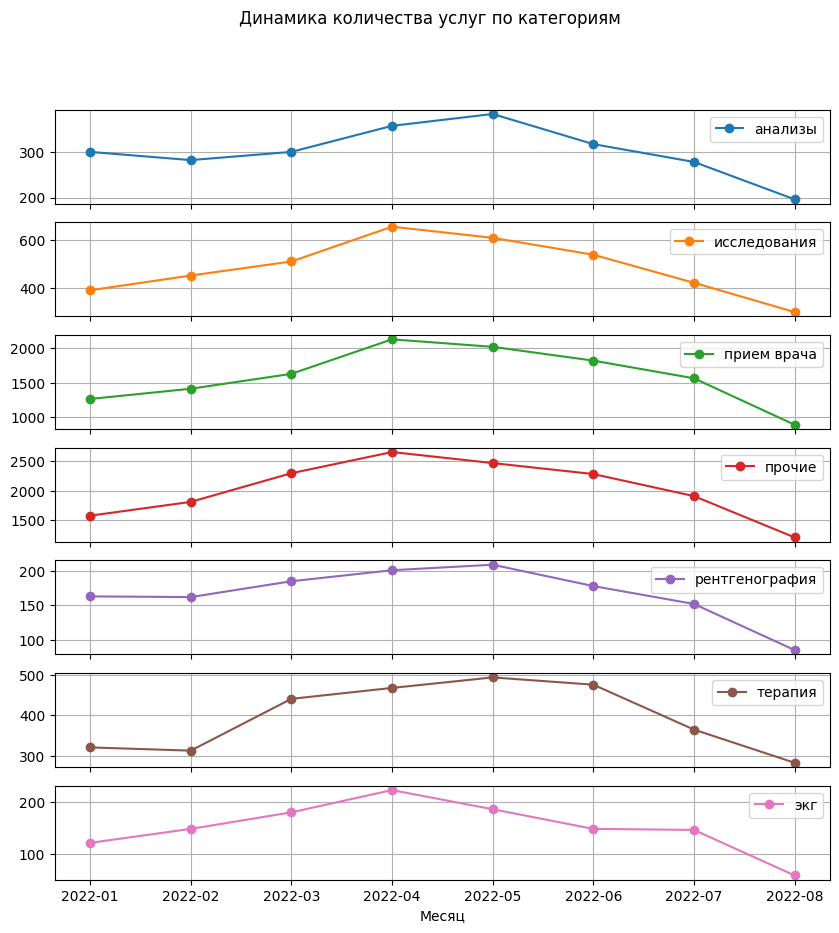

In [44]:
# создадим функцию, которая построит графики динамики количества оказанных услуг по категориям
def serv_counts_by_category(df, 
                            columns='category', 
                            subplots=True, 
                            aggfunc='count', 
                            values='service_amount',
                            title=''):
    serv_counts_by_category = (df
                          .pivot_table(index='date_trunc_month',
                                       columns=columns,
                                       values=values,
                                       aggfunc=aggfunc))
    
    serv_counts_by_category.plot(figsize=(10,10), style='-o', grid=True, subplots=subplots,
                                title=title)
    plt.xlabel("Месяц")
    ;

serv_counts_by_category(df.query('year==2022'),title='Динамика количества услуг по категориям')
    

На графике видно, что почти по всем категориям количество оказанных услуг начало сокращаться после апреля 2022 года. Скорей всего это связано с уменьшением количества клиентов. Проверим это построив динамику количества уникальных клиентов

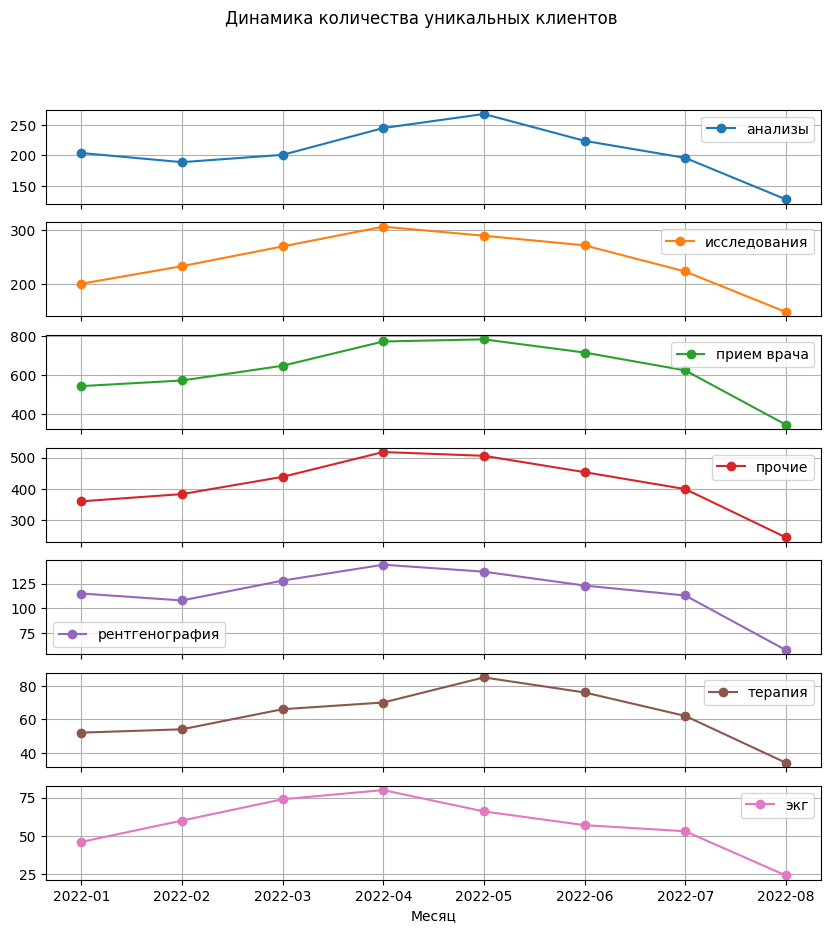

In [45]:
serv_counts_by_category(df.query('year==2022'), 
                            columns='category', 
                            subplots=True, 
                            aggfunc='nunique', 
                            values='insured',
                            title='Динамика количества уникальных клиентов')

Динамика показывает, что количество уникальных клиентов в различных категориях снижается с апреля 2022 года. Скорей всего это связано с внешними факторами, которые повлияли на спрос.

**Вывод по гипотезе 1:** Гипотеза подтверждена. Снижение выручки с апреля 2022 года обусловлено оттоком клиентов, причины оттока неизвестны.

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Хороший вопрос, на который стоило бы посикать ответ. Причина оттока клиентов.

## Гипотеза 2: Средняя выручка в марте 2021го упала из-за проведения промо или рекламной акции, в рамках которой были скидки на услуги

Для проверки гипотезы необходимо понять, как менялась стоимость услуг, в марте 2021 по сравнению с февралем.

Для начала построим хитмэп с изменением цен в марте 2021го года

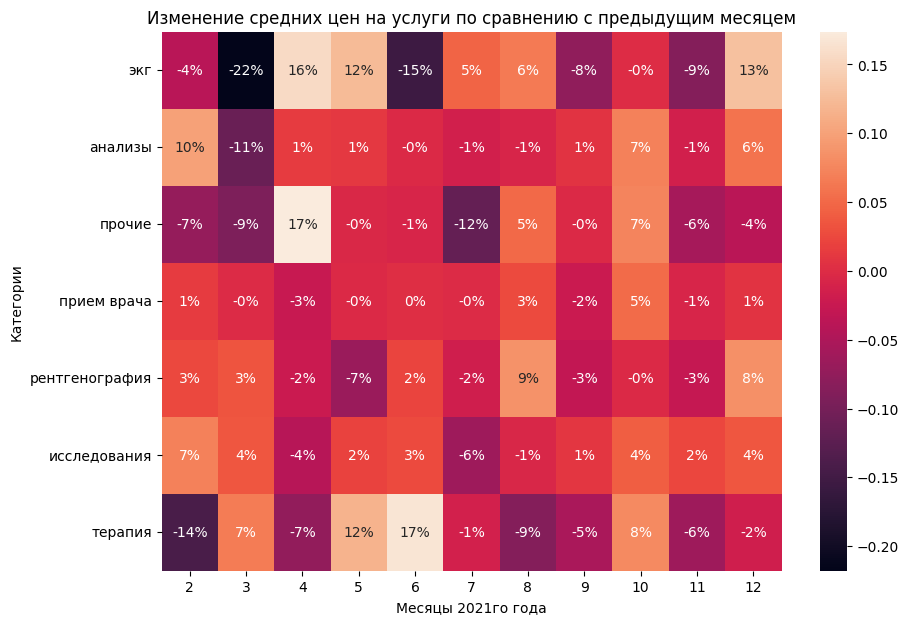

In [46]:
g1=(df[df['year']==2021]
    .pivot_table(index='category', 
                 columns='month', 
                 values='service_amount', 
                 aggfunc='mean'))

dif=g1.diff(axis=1)
delta = (dif/g1)
delta = delta.drop(columns=1)

plt.figure(figsize=(10,7))
sns.heatmap(delta.sort_values(by=3), annot=True, fmt='.0%')
plt.title('Изменение средних цен на услуги по сравнению с предыдущим месяцем')
plt.xlabel('Месяцы 2021го года')
plt.ylabel('Категории');

На графике видно, что средняя стоимость ЭКГ снизилась в марте на 22% возможно акция была именно на ЭКГ, для того, чтобы оценить влияние этих изменений на общую выручку умножим каждое изменение на долю в общей выручке

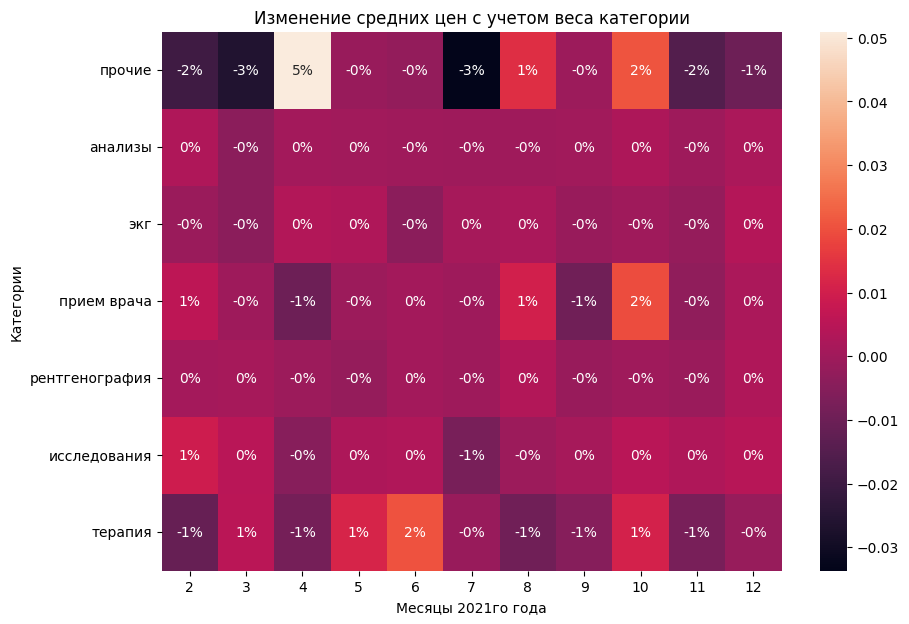

In [47]:
g2=(df[df['year']==2021]
    .pivot_table(index='category', 
                 columns='month', 
                 values='service_amount', 
                 aggfunc='sum'))
total = g2.sum()
g2 = g2.T
g2['sum'] = total
g2 =g2.div(g2['sum'], axis=0).drop(columns='sum').T
result = g2*delta
plt.figure(figsize=(10,7))
sns.heatmap(result.drop(columns=1).sort_values(by=3), annot=True, fmt='.0%')
plt.title('Изменение средних цен с учетом веса категории')
plt.xlabel('Месяцы 2021го года')
plt.ylabel('Категории');

если умножить изменение цены на долю категории от общей выручки месяца, то получается, что влияние на снижение средней выручки в марте оказывают прочие услуги. Проверим это построив динамику средней выручки без категории `прочие`

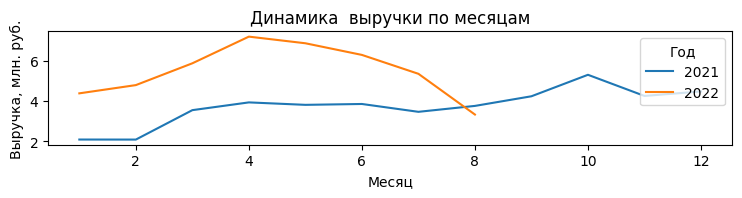

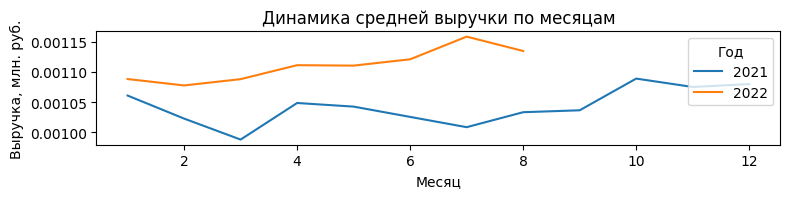

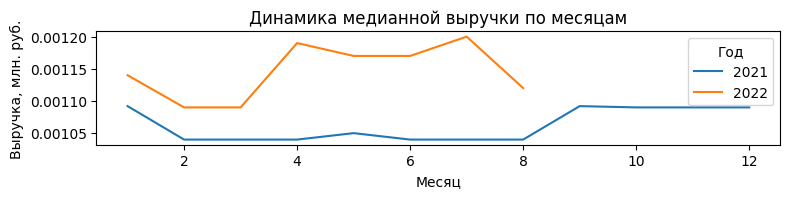

In [48]:
rev_dinamics(df.query('category!="Прочие"&service_amount_norm')) 

Как и ожидалось, на провал средней выручки в марте 2021 года повляло изменение цены по категории услуг `прочие`. Ради интереса, проверим, как будет выгдялеть динамика без категории 'ЭКГ'

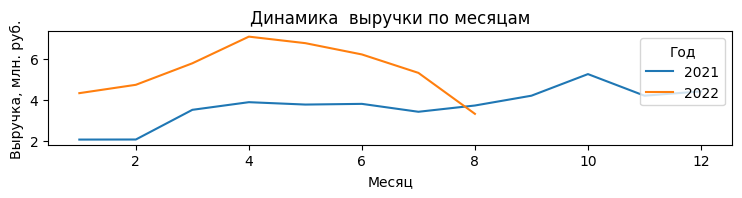

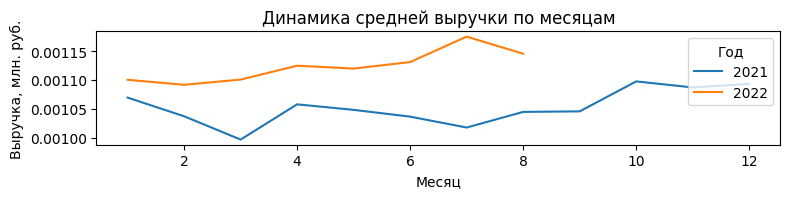

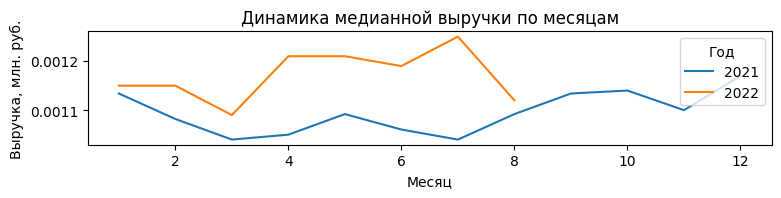

In [49]:
rev_dinamics(df.query('category!="экг"&service_amount_norm')) 

**Вывод по Гипотезе 2:** Снижение средней выручки в марте 2021 обусловлено снижением стоимости услуг входящих в категорию прочие. Скорей всего стоимость была снижена в рамках промоакции

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> ИНтересная гипотеза

## Гипотеза 3: Рост средней выручки в июле 2022го обусловлен повышением цен на услуги

Для проверки гипотезы 3 используем тот же подход, что и в гипотезе 2

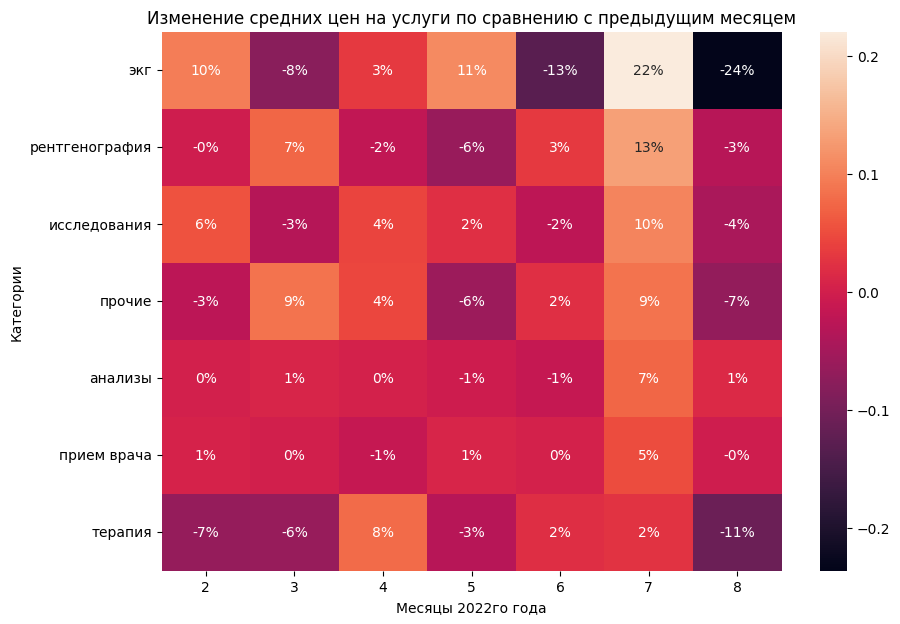

In [50]:
g1=(df[(df['year']==2022)]
    .pivot_table(index='category', 
                 columns='month', 
                 values='service_amount', 
                 aggfunc='mean'))

dif=g1.diff(axis=1)
delta = (dif/g1)
delta = delta.drop(columns=1)

plt.figure(figsize=(10,7))
sns.heatmap(delta.sort_values(by=7, ascending=False), annot=True, fmt='.0%')
plt.title('Изменение средних цен на услуги по сравнению с предыдущим месяцем')
plt.xlabel('Месяцы 2022го года')
plt.ylabel('Категории');

Матрица отображает изменение средней выручки по категориям по сравнению с прошлым месяцем, экг в среднем дороже на 22%. Построим матрицу, которая покажет эффект по весам.

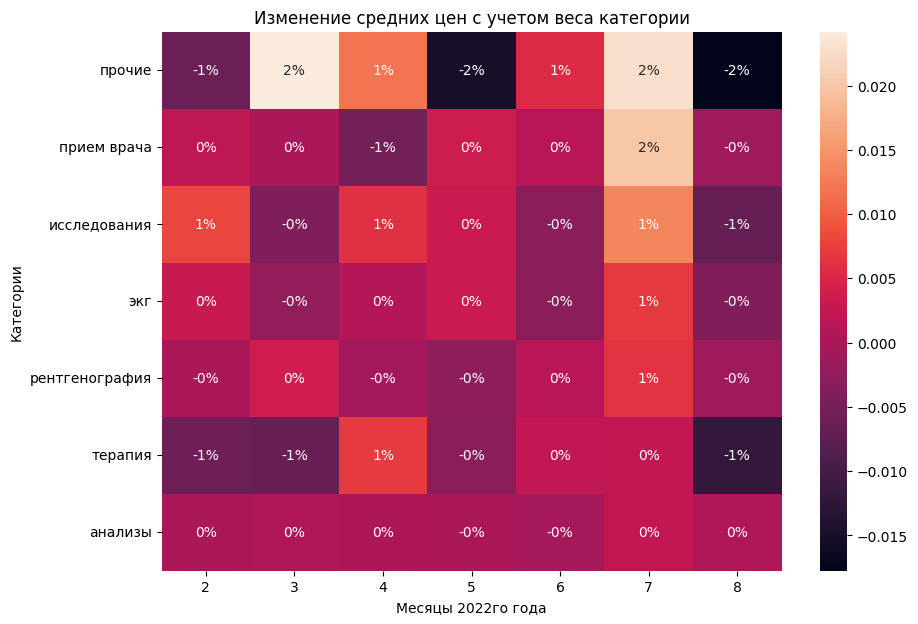

In [51]:
g2=(df[df['year']==2022]
    .pivot_table(index='category', 
                 columns='month', 
                 values='service_amount', 
                 aggfunc='sum'))
total = g2.sum()
g2 = g2.T
g2['sum'] = total
g2 =g2.div(g2['sum'], axis=0).drop(columns='sum').T
result = g2*delta
plt.figure(figsize=(10,7))
sns.heatmap(result.drop(columns=1).sort_values(by=7, ascending=False), annot=True, fmt='.0%')
plt.title('Изменение средних цен с учетом веса категории')
plt.xlabel('Месяцы 2022го года')
plt.ylabel('Категории');

Если в матрице, где рассматривалось снижение цен в марте 2021 была ярко-выраженна, категория `прочие`, то тут картина другая, здесь видно, что на среднюю выручку июля 2022 года влияет повышение цен на большинство категорий услуг. 

**Вывод по гипотезе 3:** Гипотеза подтверждена, на повышение средней выручки в июле 2022 года оказало влияние повышение средней стоимости услуг

## Средний чек

In [52]:
# построим сводную по датам и рассчитаем средний чек по месяцам
pt = df.groupby('date_trunc_month').agg({'insured':'nunique', 'service_amount':['sum','mean'],'sex_id':'count'}).reset_index()
pt.columns = pt.columns.droplevel()
pt=pt.rename(columns={'':'date_trunc_month','nunique':'uniq_client', 'sum':'total_rev','mean':'avg_bill', 'count':'service_count'})
pt.head()

,date_trunc_month,uniq_client,total_rev,avg_bill,service_count
0,2021-01,286,2265931,1121.19,2021
1,2021-02,309,2379125,1122.23,2120
2,2021-03,446,3927248,1062.57,3696
3,2021-04,466,4377704,1132.07,3867
4,2021-05,468,4297508,1134.81,3787


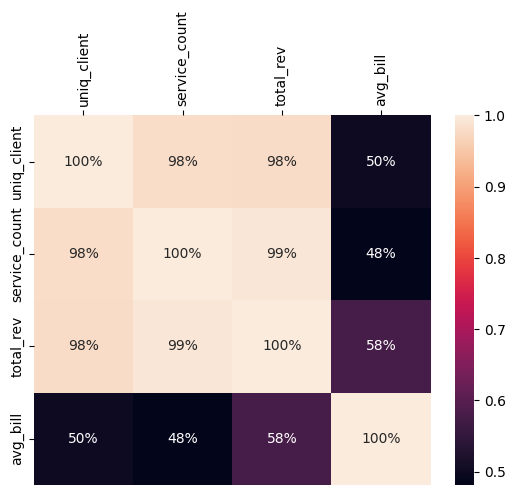

In [53]:
(sns.heatmap(pt.corr(numeric_only=True)
             .sort_values(by='uniq_client', axis=1, ascending=False)
             .sort_values(by='uniq_client', axis=0, ascending=False), 
              annot=True, 
              fmt='.0%')).xaxis.tick_top()
plt.xticks(rotation='vertical');

Судя по сводной тесная линейная взаимосвязь наблюдается у:
 - Количества услуг и количества уникальных клиентов
 - Количества услуг и выручки

Связь между средним чеком и другими показателями довольно слабая, что странно, т.к. расчет среднего чека это отношение выручки к количеству услуг. Изобразим динамику среднего чека с выручкой и изучим график.

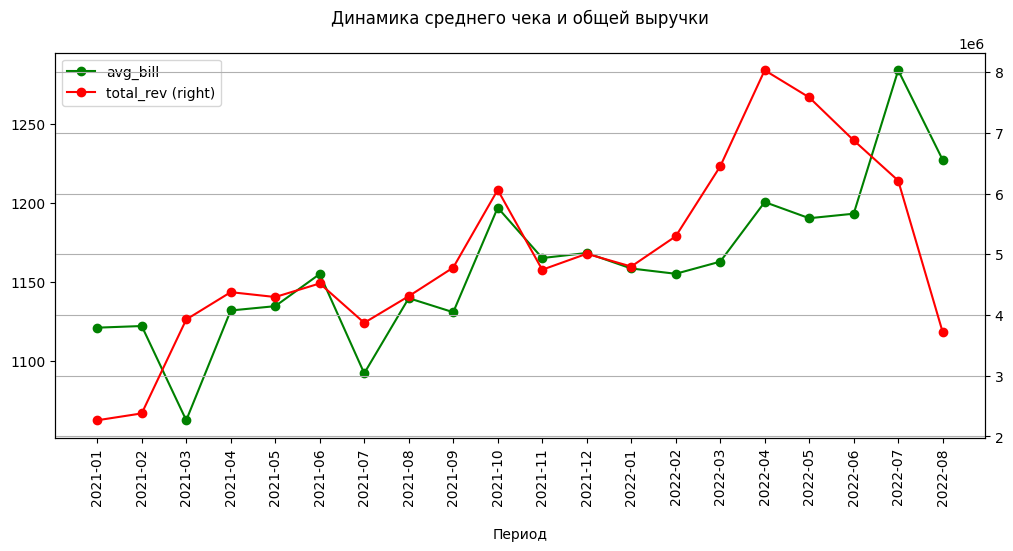

In [54]:
pt.plot(x='date_trunc_month',
        y=['avg_bill','total_rev'],
        figsize=(12,5),  
        grid=True, 
        style="o-", 
        color=['green', 'red'],
        secondary_y='total_rev',
        xticks=pt.date_trunc_month.index,
        rot = 90,
        xlabel='\nПериод',
        title='Динамика среднего чека и общей выручки\n'
       );

График отражает знакомую картину:
* в марте 2021го средний чек падал, а выручка росла,
* В июле 2022 средний чек растет, а выручка падает, т.к. корреляция между выручкой, количеством услуг и количеством уникальных клиентов тесная, можем сказать, что они тоже падали, на всякий случай проверим это построив график всех показателей

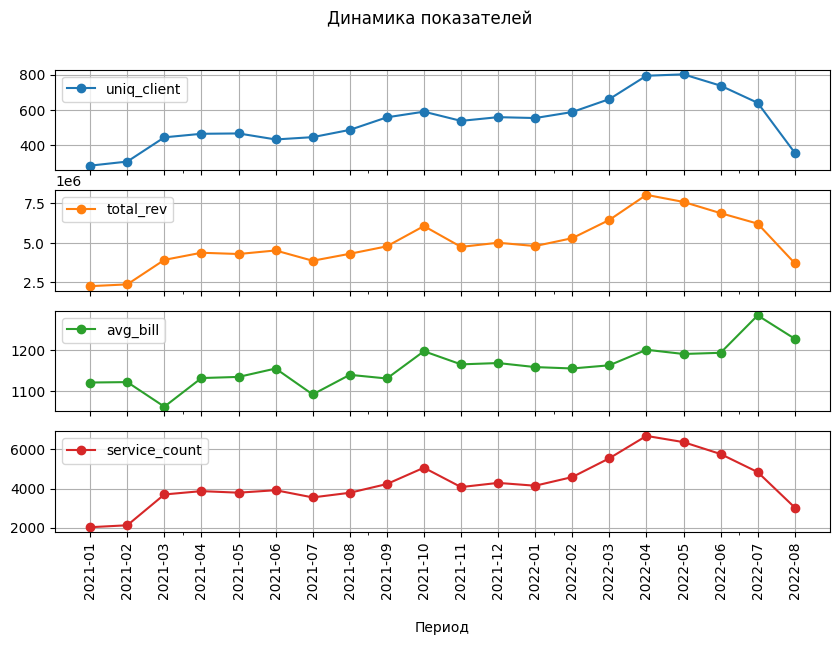

In [55]:
pt.plot(x='date_trunc_month', 
        subplots=True,
        figsize=(10,6),
        grid=True,
        xticks=pt.date_trunc_month.index, 
        rot=90, 
        style='o-',
        xlabel='\nПериод',
        title='Динамика показателей');

чтд при росте среднего чека в июле 2022, падают выручка, количество оказанных услуг, количество уникальных клиентов. Можно сказать, что выручка падает из-за снижения количества оказанных услуг, которое связано со снижением количества уникальных клиентов. Выручка, клиенты и услуги падают с апреля, но заметно, что с июля по август падение было резким, скорей всего повышение цен оттулкнуло часть клиентов.

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Очень наглядно!

## Динамика выручки по возрастным категориям

In [56]:
# создадим функцию для отображения динамики и распределения
def category_dynamics(df, 
                  x='month', 
                  y='service_amount', 
                  hue='age_category', 
                  estimator='sum', 
                  xlabel='месяц', 
                  ylabel='Количество',
                  title1='Динамика выручки 2022 года по возрастным категориям', 
                  title2='Распредедение 2022 года'):

    sns.lineplot(df,x=x, y=y, hue=hue, estimator=estimator)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title1)
    plt.show()
    
    
    sns.displot(df,x=x, hue=hue, multiple="stack")
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title2)
    plt.show()


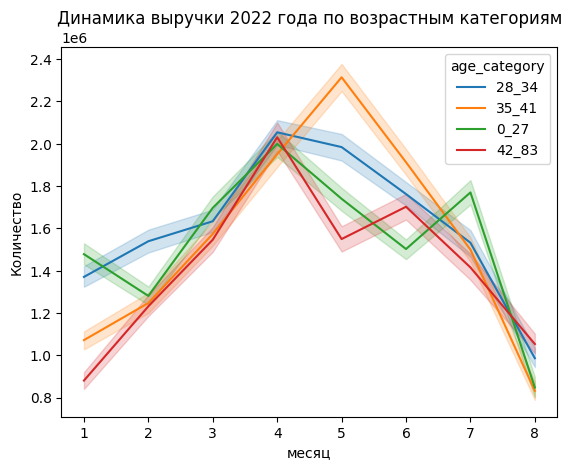

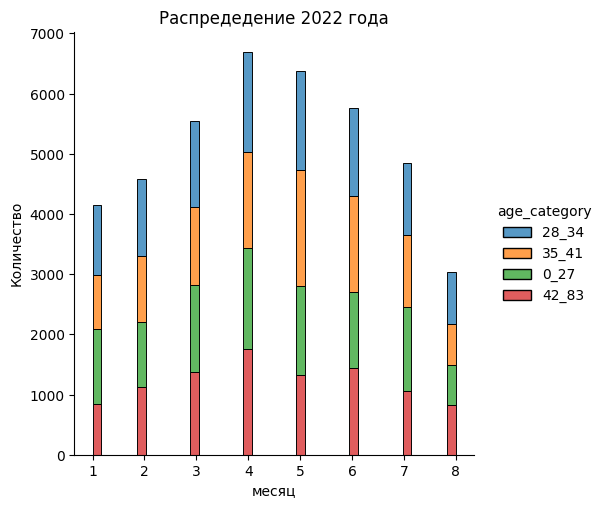

In [57]:
category_dynamics(df.query('year==2022'), 
                  x='month', 
                  y='service_amount', 
                  hue='age_category', 
                  estimator='sum', 
                  xlabel='месяц', 
                  ylabel='Количество',
                  title1='Динамика выручки 2022 года по возрастным категориям', 
                  title2='Распредедение 2022 года')

На первом графике видно, что после апреля начала падать выручка по всем возрастным категориям, кроме 35_41, выручка этой категории росла до мая 2022 и только после этого началось снижение. Если изучить гистограмму в разбивке по категориям, то заметно, что количество услуг категории 35_41 в мае больше по сравнению с апрелем, возможно именно это повлияло на рост выручки данной категории, по сравнению с другими, которые показали падение. Основой вывод, падение или рост выручки категории обусловленo увеличением или уменьшением количеста оказанных ей услуг, а также изменением количества уникальных клиентов.

## Динамика выручки по категориям стоимости услуг

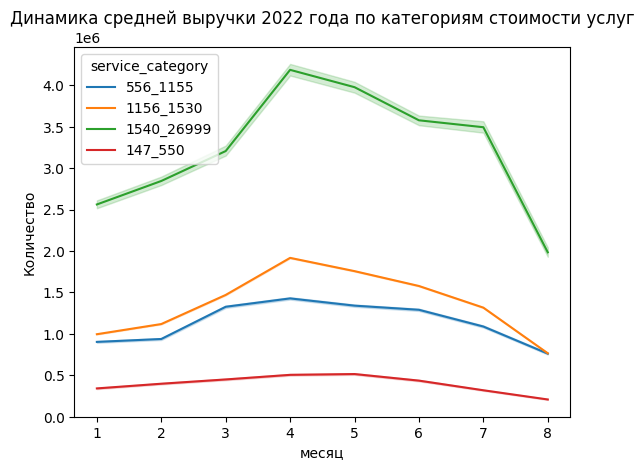

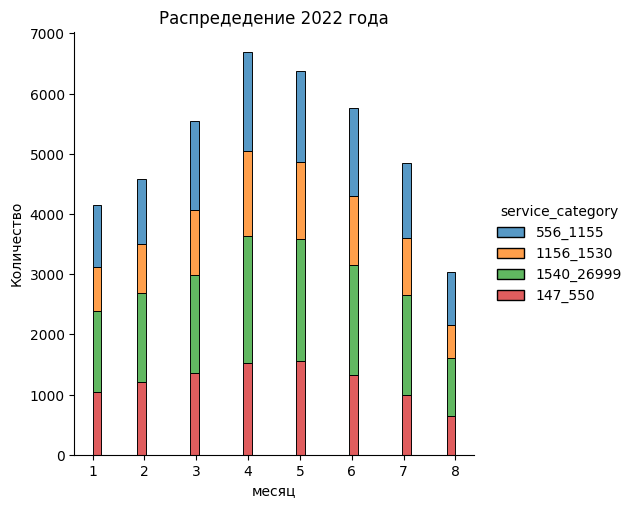

In [58]:
category_dynamics(df.query('year==2022'), 
                  x='month', 
                  y='service_amount', 
                  hue='service_category', 
                  estimator='sum', 
                  xlabel='месяц', 
                  ylabel='Количество',
                  title1='Динамика средней выручки 2022 года по категориям стоимости услуг', 
                  title2='Распредедение 2022 года')

В данном случае, после апреля, снижение выручки произошло по всем категориям, что говорит о равномерном распределении стоимости услуг у разных клиентов, общее число которых сокращается.

# Зависимости

## Зависимость стоимости услуг от возрастной категории


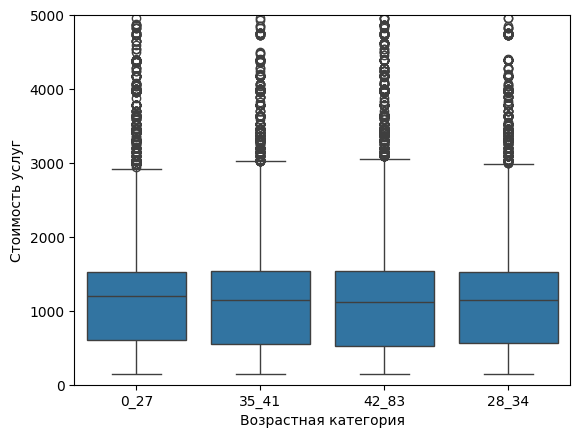

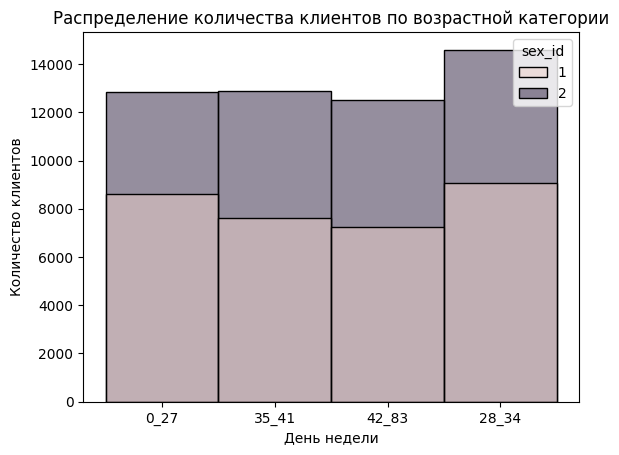

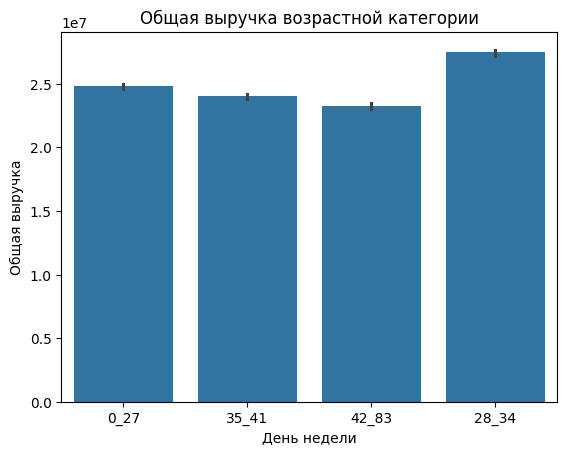

In [59]:
ticks = df[['age_category_id','age_category']].drop_duplicates().sort_values(by='age_category_id').reset_index(drop=True)
sns.boxplot(df, x='age_category', y='service_amount')
plt.ylim(0,5000)
plt.ylabel('Стоимость услуг')
plt.xlabel('Возрастная категория')
plt.show();   

sns.histplot(df, x='age_category', hue='sex_id')
plt.title('Распределение количества клиентов по возрастной категории')
plt.ylabel('Количество клиентов')
plt.xlabel('День недели')
plt.show();

sns.barplot(df, x='age_category', y='service_amount', estimator='sum')
plt.title('Общая выручка возрастной категории')
plt.ylabel('Общая выручка')
plt.xlabel('День недели')
plt.show();

Возраст не влияет на покупку более дорогих или дешевых услуг, в среднем каждая категория платит одну и ту же цену за услуги. Женщины любой возрастной категории чаще пользуются услугами центра. Чаще всего клинику посещают люди в возрастном диапазоне 28-34 лет, а реже всего пользуются услугами центра люди с 42 лет и старше. По выручке ситуация аналогичная

In [60]:
df.groupby('age_category').agg({'insured':'count'})

,insured
age_category,
0_27,21430
28_34,23663
35_41,20486
42_83,19786


## Зависимость стоимости услуг от пола

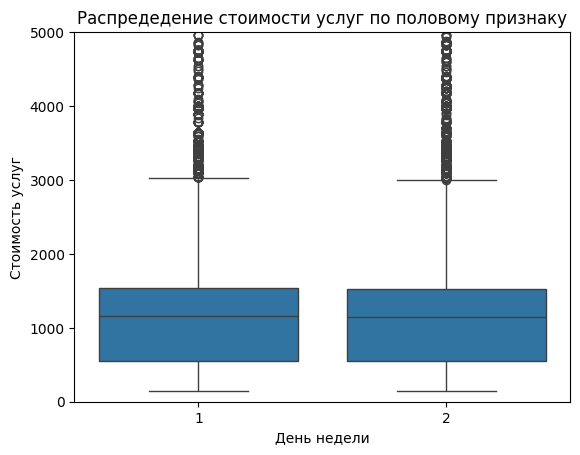

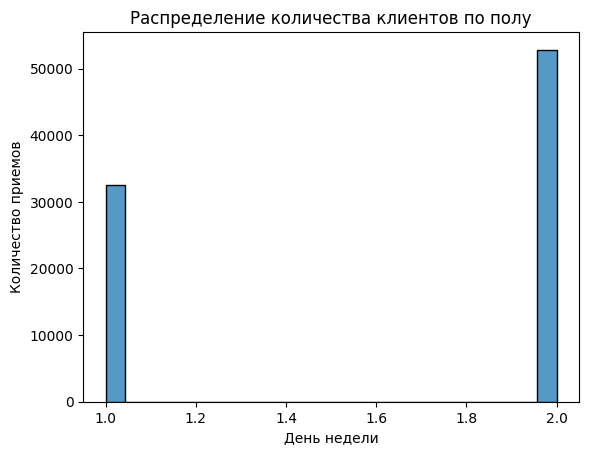

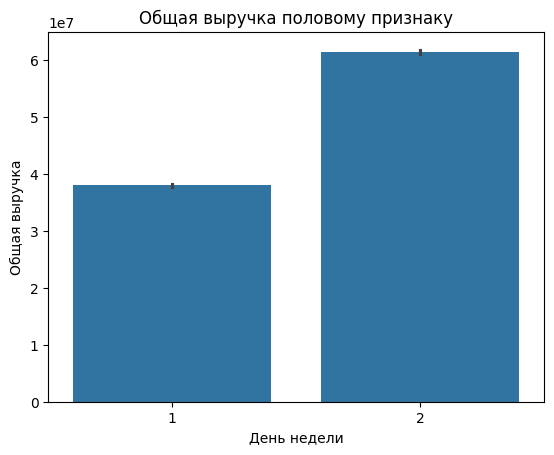

In [61]:
sns.boxplot(df, x='sex_id', y='service_amount')
plt.title('Распредедение стоимости услуг по половому признаку')
plt.ylim(0,5000)
plt.ylabel('Стоимость услуг')
plt.xlabel('День недели')
plt.show();

sns.histplot(df, x='sex_id')
plt.title('Распределение количества клиентов по полу')
plt.ylabel('Количество приемов')
plt.xlabel('День недели')
plt.show();

sns.barplot(df, x='sex_id', y='service_amount', estimator='sum')
plt.title('Общая выручка половому признаку')
plt.ylabel('Общая выручка')
plt.xlabel('День недели')
plt.show();
            

Особой зависимости между полом и стоимостью услуг не наблюдается, однако чаще посещают центр женщины, и приносят больше выручки тоже женщины

<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Можно было бы выстроить месячную динамику среднего чека и выручки по полу и посмотреть за счёт чего росла выручка до июля 22 года. 

## Зависимость стоимости услуг и дня недели

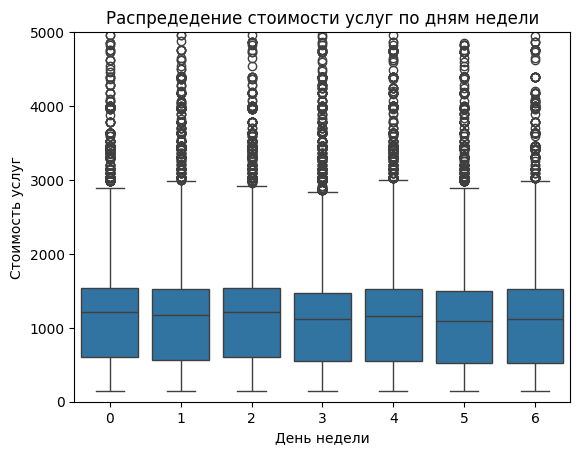

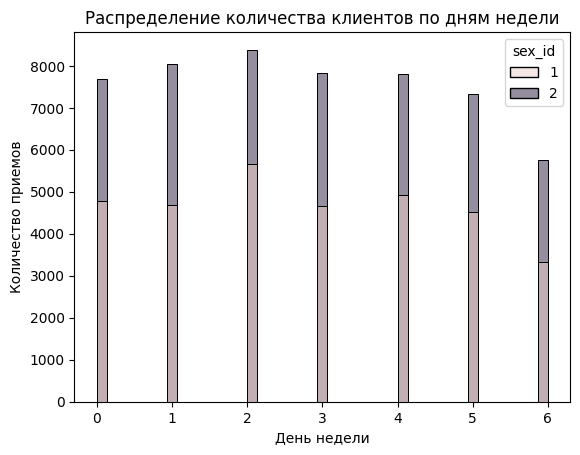

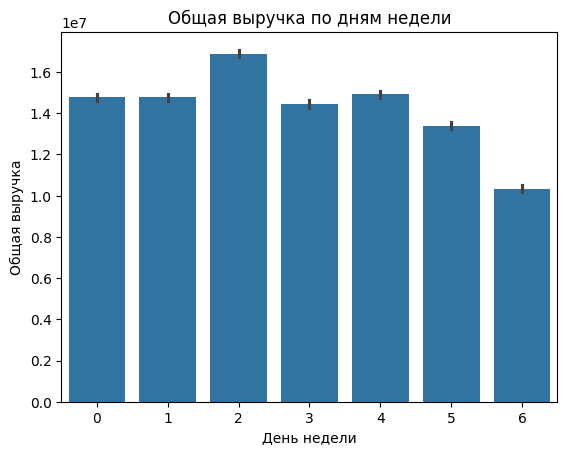

In [62]:

sns.boxplot(df, x='weekday', y='service_amount')
plt.title('Распредедение стоимости услуг по дням недели')
plt.ylim(0,5000)
plt.ylabel('Стоимость услуг')
plt.xlabel('День недели')
plt.show();

sns.histplot(df, x='weekday', hue='sex_id')
plt.title('Распределение количества клиентов по дням недели')
plt.ylabel('Количество приемов')
plt.xlabel('День недели')
plt.show();

sns.barplot(df, x='weekday', y='service_amount', estimator='sum')
plt.title('Общая выручка по дням недели')
plt.ylabel('Общая выручка')
plt.xlabel('День недели')
plt.show();
            

В среднем, стоимость услуг не зависит от дня недели, при этом чаще клиенты посещают клинику в среду, а реже всего приходят в воскресенье, соответственно, выручка в среду самая высокая, а в воскресенье самя низкая

# Выводы

**Цель исследования:** Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года

**Наблюдения:**
 * больше всего услуг было оказано в апреле и мае 2022 года, меньше всего в первые два месяца 2021.
 * чаще всего стоимость услуг не превышает 3 тыс. руб. чаще всего стоимость услуг в диапазонах 1.3-1.5т. руб.
 * в рамках одной записи редко больше одной услуги.
 * чаще услугами центра пользуются девушки (2).
 * целевая аудитория центра в находится в возрасте от 20-40 лет.
 * c января по август, самыми популярными месяцами являются апрель, май и июнь, т.е. 2й кваратал.
 * Кажется, что чем старше возраст, тем хуже обстоят дела со здоровьем, однако распределение показывает, что после 40 лет, люди реже обращаются в центр. Скорей всего это связано с платежеспособностью и чем выше возраст, тем больше вероятность, что пациент выберет бесплатную поликлинику.

**Зависимости**
 - Возраст не влияет на покупку более дорогих или дешевых услуг, в среднем каждая категория платит одну и ту же цену за услуги. Женщины любой возрастной категории чаще пользуются услугами центра. Чаще всего клинику посещают люди в возрастном диапазоне 28-34 лет, а реже всего пользуются услугами центра люди с 42 лет и старше. По выручке ситуация аналогичная.
 - В среднем, стоимость услуг не зависит от дня недели, при этом чаще клиенты посещают клинику в среду, а реже всего приходят в воскресенье, соответственно, выручка в среду самая высокая, а в воскресенье самя низкая.
 - Особой зависимости между полом и стоимостью услуг не наблюдается, однако чаще посещают центр женщины, и приносят больше выручки тоже женщины.

**Гипотеза 1: Снижение выручки с апреля 2022 года связано с оттоком клиентов**
Динамика показывает, что количество уникальных клиентов в различных категориях снижается с апреля 2022 года. Скорей всего это связано с внешними факторами, которые повлияли на спрос.

**Вывод по гипотезе 1:** Гипотеза подтверждена. Снижение выручки с апреля 2022 года обусловлено оттоком клиентов, причины оттока неизвестны.


**Гипотеза 2: Средняя выручка в марте 2021го упала из-за проведения рекламной или промо акции**
На провал средней выручки в марте 2021 года повляло изменение цены по категории услуг прочие.

**Вывод по Гипотезе 2:** Снижение средней выручки в марте 2021 обусловлено снижением стоимости услуг входящих в категорию прочие. Скорей всего стоимость была снижена в рамках промоакции

**Гипотеза 3: Рост средней выручки в июле 2022го обусловлен повышением цен на услуги**
На среднюю выручку июля 2022 года влияет повышение цен на большинство категорий услуг.

**Вывод по гипотезе 3:** Гипотеза подтверждена, на повышение средней выручки в июле 2022 года оказало влияние повышение средней стоимости услуг.

**Средний чек**
* В марте 2021го средний чек падал, а выручка росла,
* В июле 2022 средний чек растет, а падают выручка, количество оказанных услуг, количество уникальных клиентов. Можно сказать, что выручка падает из-за снижения количества оказанных услуг, которое связано со снижением количества уникальных клиентов. Выручка, клиенты и услуги падают с апреля, но заметно, что с июля по август падение было резким, скорей всего повышение цен также оттулкнуло часть клиентов.

**Рекомендации**
* 2й квартал вырывается по посещаемости, возможно имеет смысл в другие кварталы больше инвестировать в привлечение.
* Для проведения акций стоит выбирать услуги до 3 тыс. руб. т.к. они оказываются чаще всего и скорей всего вероятность того, что затраты на рекламу окупятся. А таргет настраивать на возраст 20-40 лет, и преимущественно женщинам
* Т.к. в среднем в воскресенье меньше клиентов, можно сократить количество персонала в этот день, чтобы сократить расходы, и выводить больше сотрудников в среду




<font color='#31708f'>📝 <b>Комментарий ревьюера:</b> Спасибо тебе за проделанный труд! Работа очень целостная, детальная. Ты хорошо пишешь код, пользуешься функциями, уделяешь внимание деталям. Хорошо строишь графики, наглядно демонстрируешь свои гипотезы на графиках. Проект структурирован, есть комментарии, выводы. Рекомендую тебе доработать проект просле прохождения спринта по стат анализу.